In [1]:
from openturns.usecases import ishigami_function
import openturns as ot
import openturns.viewer as viewer
from matplotlib import pylab as plt
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
ot.Log.Show(ot.Log.NONE)
plt.rcParams['font.family'] = 'Times New Roman'
from matplotlib.ticker import ScalarFormatter
from matplotlib import gridspec
import math
import pandas as pd
import os
import inspect
from IPython import get_ipython

ComposedDistribution(Uniform(a = 1.5, b = 10.87), Uniform(a = 0, b = 0.18), Uniform(a = 0.01, b = 0.4), IndependentCopula(dimension = 3))
[0.28322,0.729748,0.184194]
ComposedDistribution(Uniform(a = 1.5, b = 10.87), Uniform(a = 0, b = 0.18), Uniform(a = 0.01, b = 0.4), IndependentCopula(dimension = 3))
[0.0767793,0.103756,0.129099]


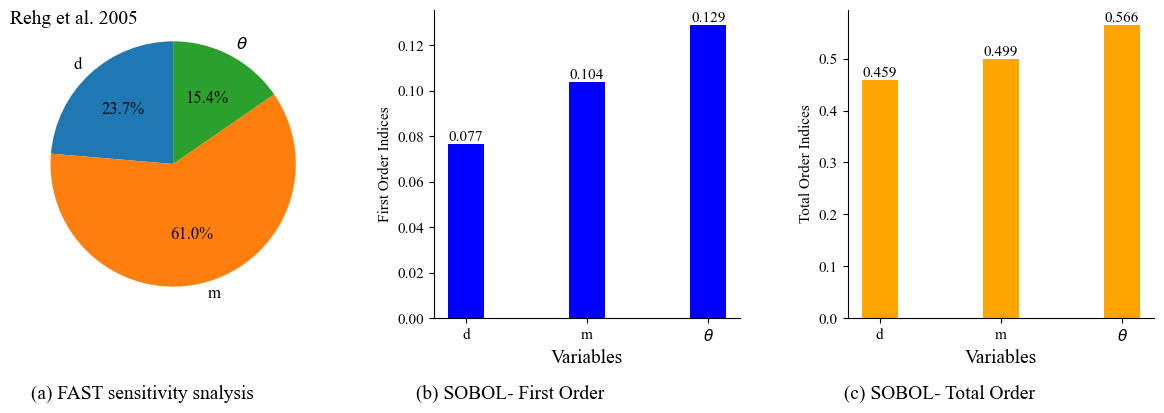

Most sensitive parameter: $\theta$
Least sensitive parameter: d
Parameters in descending order of sensitivity:
$\theta$ > m > d
Top 3 sensitivity parameters based on combined indices: ['$\\theta$', 'm', 'd']


In [2]:
# Model Name: Rehg et al. 2005
ot.RandomGenerator.SetSeed(0)

formula = ['d/((m*theta)+d)'] 

model = ot.SymbolicFunction(['d', 'm', 'theta'], formula)
distributions = [ot.Uniform(1.5, 10.87),  # effective stream depth (total volume of stream water per unit bed area)(cm)
                 ot.Uniform(0, 0.18),  # average depth of solute penetration into the bed (cm)
                 ot.Uniform(0.01, 0.4)]  # bulk porosity


distribution = ot.ComposedDistribution(distributions)
print(distribution)
sensitivityAnalysis = ot.FAST(model, distribution, 101)
print(sensitivityAnalysis.getFirstOrderIndices())

y = np.array(sensitivityAnalysis.getFirstOrderIndices())
mylab = ['d', 'm', r'$\theta$']

# FAST Analysis
hover_template = '<b>%{label}</b><br>Value: %{value:.2f}<br>Percent: %{percent:.2%}<br>First Order Index: %{text:.2E}'
fig = plt.figure(figsize=(18, 4))
gs = gridspec.GridSpec(1, 4, width_ratios=[2, 2, 2,1])

ax_pie = plt.subplot(gs[0])
ax_pie.pie(y, labels=mylab, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12})
ax_pie.set_aspect('equal')
ax_pie.text(0.4, -0.25, '(a) FAST sensitivity snalysis', ha='center', va='center', transform=ax_pie.transAxes, fontsize=14)


#SOBOL Analysis

ot.RandomGenerator.SetSeed(0)

distribution = ot.ComposedDistribution(distributions)
print(distribution)
sensitivityAnalysis = ot.SobolIndicesAlgorithm(distribution, 101, model)
print(sensitivityAnalysis.getFirstOrderIndices())

# First order index
sensitivityIndices = sensitivityAnalysis.getFirstOrderIndices()
minIndex = np.argmin(sensitivityIndices)
maxIndex = np.argmax(sensitivityIndices)
leastSensitiveVariable_first_order = mylab[minIndex]
mostSensitiveVariable_first_order = mylab[maxIndex]

# Total order index
totalOrderIndices = sensitivityAnalysis.getTotalOrderIndices()
minIndex = np.argmin(totalOrderIndices)
maxIndex = np.argmax(totalOrderIndices)
leastSensitiveVariable_total_order = mylab[minIndex]
mostSensitiveVariable_total_order = mylab[maxIndex]

y1 = np.array(sensitivityAnalysis.getFirstOrderIndices()) #defining y axis
y2 = np.array(totalOrderIndices)

# Bar Chart for First Order Indices
ax_plt1 = plt.subplot(gs[1])
bars = ax_plt1.bar(mylab, y1, color='blue', width=0.3)
#ax_plt1.set_title('First Order Indices')
ax_plt1.set_xlabel('Variables',fontsize=14)
ax_plt1.set_ylabel('First Order Indices',fontsize=11)
ax_plt1.bar_label(bars, fmt='%.3f', label_type='edge', color='black', fontsize=11)
ax_plt1.spines['top'].set_visible(False)
ax_plt1.spines['right'].set_visible(False)
ax_pie.text(1.6, -0.25, '(b) SOBOL- First Order', ha='center', va='center', transform=ax_pie.transAxes, fontsize=14)

# Bar Chart for Total Order Indices
ax_plt2 = plt.subplot(gs[2])
bars = ax_plt2.bar(mylab, y2, color='orange', width=0.3)
#ax_plt2.set_title('Total Order Indices')
ax_plt2.set_xlabel('Variables',fontsize=14)
ax_plt2.set_ylabel('Total Order Indices',fontsize=11)
ax_plt2.bar_label(bars, fmt='%.3f', label_type='edge', color='black', fontsize=11)
ax_plt2.spines['top'].set_visible(False)
ax_plt2.spines['right'].set_visible(False)
ax_pie.text(3.0, -0.25, '(c) SOBOL- Total Order', ha='center', va='center', transform=ax_pie.transAxes, fontsize=14)

# Set xlabel at the bottom for each subplot
fig.subplots_adjust(wspace=0.4)  # Adjust spacing between subplots
for ax in fig.get_axes():
    for tick in ax.xaxis.get_major_ticks():        
        tick.label.set_fontsize(11) 
        tick.label.set_color('black')
    for tick in ax.yaxis.get_major_ticks():        
        tick.label.set_fontsize(11) 
        tick.label.set_color('black')
        
plt.suptitle("Rehg et al. 2005", x=0.155, y=.88, fontsize=14)
plt.show()
fig.savefig('C:/Users/mouly/Dropbox/Abdul_Work/Paper/Figures/Rehg et al. 2005.jpg', dpi=300, bbox_inches='tight')

# Normalize SOBOL indices for comparison
max_sobol_first_order = np.max(sensitivityIndices)
min_sobol_first_order = np.min(sensitivityIndices)
normalized_sobol_first_order = (sensitivityIndices - min_sobol_first_order) / (max_sobol_first_order - min_sobol_first_order)

max_sobol_total_order = np.max(totalOrderIndices)
min_sobol_total_order = np.min(totalOrderIndices)
normalized_sobol_total_order = (totalOrderIndices - min_sobol_total_order) / (max_sobol_total_order - min_sobol_total_order)

# Combine FAST and normalized SOBOL indices
# Assuming equal weight for FAST and SOBOL indices
combined_indices = {
    'FAST': y,
    'SOBOL_First_Order': normalized_sobol_first_order,
    'SOBOL_Total_Order': normalized_sobol_total_order
}

# Compute average sensitivity indices for each parameter
average_sensitivity_indices = np.mean(list(combined_indices.values()), axis=0)

# Combine and rank the parameters
combined_sensitivity = sorted(zip(average_sensitivity_indices, mylab), reverse=True)

# Extract top 3 parameters
top_3_sensitivity = combined_sensitivity[:3]

# Create list of parameters ordered by combined sensitivity
ordered_parameters = ' > '.join(param for _, param in combined_sensitivity)

# Print the most and least sensitive parameters
print(f"Most sensitive parameter: {mostSensitiveVariable_first_order}")
print(f"Least sensitive parameter: {leastSensitiveVariable_first_order}")

# Print the parameters in descending order of sensitivity
print("Parameters in descending order of sensitivity:")
print(ordered_parameters)

# Print Top 3 Sensitivity Parameters
print(f"Top 3 sensitivity parameters based on combined indices: {[param for _, param in top_3_sensitivity]}")


# Store results in variables
most_sensitive_variable = mostSensitiveVariable_first_order
least_sensitive_variable = leastSensitiveVariable_first_order
top_3_parameters = '> '.join([param for _, param in top_3_sensitivity])
ordered_parameters = ' > '.join(param for _, param in combined_sensitivity)

# Function to write results to file
def write_results_to_file(model_name, formula, distributions, most_sensitive_variable, least_sensitive_variable, top_3_parameters, ordered_parameters):
    # Convert distributions to a readable format
    param_ranges = {f'distribution_{i}': f"{dist.getRange().getLowerBound()[0]} - {dist.getRange().getUpperBound()[0]}" for i, dist in enumerate(distributions)}

    # Prepare the results to write
    results = (
        f"Model Name: {model_name}\n"
        f"Formula: {formula[0]}\n"
        f"Parameter Ranges: {param_ranges}\n"
        f"Most sensitive parameter: {most_sensitive_variable}\n"
        f"Least sensitive parameter: {least_sensitive_variable}\n"
        f"Top 3 sensitivity parameters based on combined indices: {top_3_parameters}\n"
        f"Parameters in descending order of sensitivity: {ordered_parameters}\n"
        "\n"
    )

    # Check if the model's results already exist in the file
    if os.path.exists('results.txt'):
        with open('results.txt', 'r') as f:
            content = f.read()
        if results not in content:
            with open('results.txt', 'a') as f:
                f.write(results)
    else:
        with open('results.txt', 'w') as f:
            f.write(results)

# Extract the current cell source code
ipython = get_ipython()
cell_source = ipython.history_manager.input_hist_parsed[-1]

# Extract model name from the first comment
model_name = ""
for line in cell_source.split('\n'):
    if line.startswith("# Model Name:"):
        model_name = line.split(": ")[1].strip()
        break

# Write results to results.txt
write_results_to_file(model_name, formula, distributions, most_sensitive_variable, least_sensitive_variable, top_3_parameters, ordered_parameters)


ComposedDistribution(Uniform(a = 48.1, b = 113.3), Uniform(a = 49, b = 137), Uniform(a = 2462, b = 5543), IndependentCopula(dimension = 3))
[0.355424,0.545105,0.00434076]
ComposedDistribution(Uniform(a = 48.1, b = 113.3), Uniform(a = 49, b = 137), Uniform(a = 2462, b = 5543), IndependentCopula(dimension = 3))
[0.318172,0.603745,0.0124463]


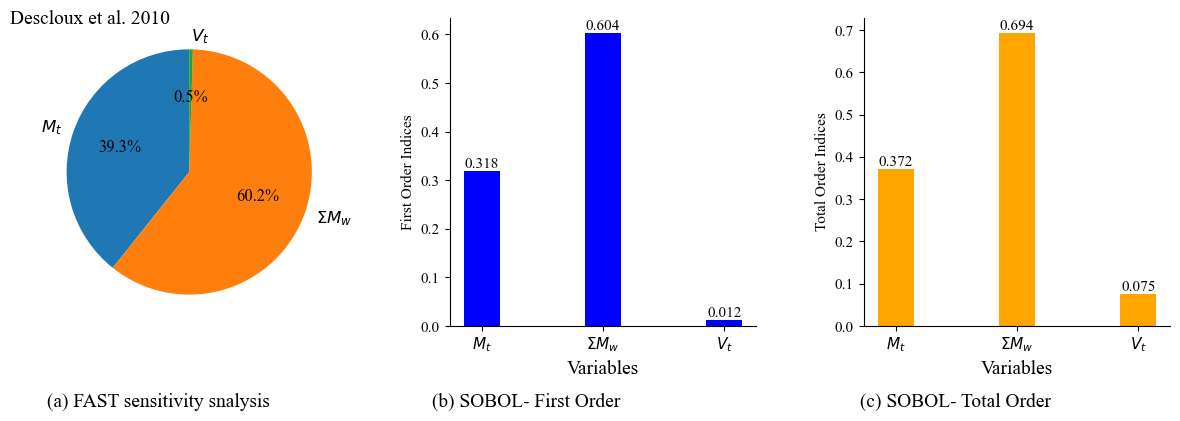

Most sensitive parameter: $\Sigma {M_w}$
Least sensitive parameter: $V_t$
Parameters in descending order of sensitivity:
$\Sigma {M_w}$ > $M_t$ > $V_t$
Top 3 sensitivity parameters based on combined indices: ['$\\Sigma {M_w}$', '$M_t$', '$V_t$']


In [3]:
# Model Name: Descloux et al. 2010
ot.RandomGenerator.SetSeed(0)


formula = ['(((Mt-sum_Mw)*1000)/Vt)*100'] 

model = ot.SymbolicFunction(['Mt', 'sum_Mw', 'Vt'], formula)
distributions = [ot.Uniform(48.1, 113.3), # Total mass of sample core [kg]
                 ot.Uniform(49, 137), # Mass of wet sediments
                 ot.Uniform(2462, 5543)] #  Total volume of sample core


distribution = ot.ComposedDistribution(distributions)
print(distribution)
sensitivityAnalysis = ot.FAST(model, distribution, 101)
print(sensitivityAnalysis.getFirstOrderIndices())

y = np.array(sensitivityAnalysis.getFirstOrderIndices())
mylab = ['$M_t$', r'$\Sigma {M_w}$','$V_t$']

# FAST Analysis
hover_template = '<b>%{label}</b><br>Value: %{value:.2f}<br>Percent: %{percent:.2%}<br>First Order Index: %{text:.2E}'
fig = plt.figure(figsize=(18, 4))
gs = gridspec.GridSpec(1, 4, width_ratios=[2, 2, 2,1])

ax_pie = plt.subplot(gs[0])
ax_pie.pie(y, labels=mylab, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12})
ax_pie.set_aspect('equal')
ax_pie.text(0.4, -0.25, '(a) FAST sensitivity snalysis', ha='center', va='center', transform=ax_pie.transAxes, fontsize=14)


#SOBOL Analysis

ot.RandomGenerator.SetSeed(0)

distribution = ot.ComposedDistribution(distributions)
print(distribution)
sensitivityAnalysis = ot.SobolIndicesAlgorithm(distribution, 101, model)
print(sensitivityAnalysis.getFirstOrderIndices())

# First order index
sensitivityIndices = sensitivityAnalysis.getFirstOrderIndices()
minIndex = np.argmin(sensitivityIndices)
maxIndex = np.argmax(sensitivityIndices)
leastSensitiveVariable_first_order = mylab[minIndex]
mostSensitiveVariable_first_order = mylab[maxIndex]

# Total order index
totalOrderIndices = sensitivityAnalysis.getTotalOrderIndices()
minIndex = np.argmin(totalOrderIndices)
maxIndex = np.argmax(totalOrderIndices)
leastSensitiveVariable_total_order = mylab[minIndex]
mostSensitiveVariable_total_order = mylab[maxIndex]

y1 = np.array(sensitivityAnalysis.getFirstOrderIndices()) #defining y axis
y2 = np.array(totalOrderIndices)

# Bar Chart for First Order Indices
ax_plt1 = plt.subplot(gs[1])
bars = ax_plt1.bar(mylab, y1, color='blue', width=0.3)
#ax_plt1.set_title('First Order Indices')
ax_plt1.set_xlabel('Variables',fontsize=14)
ax_plt1.set_ylabel('First Order Indices',fontsize=11)
ax_plt1.bar_label(bars, fmt='%.3f', label_type='edge', color='black', fontsize=11)
ax_plt1.spines['top'].set_visible(False)
ax_plt1.spines['right'].set_visible(False)
ax_pie.text(1.6, -0.25, '(b) SOBOL- First Order', ha='center', va='center', transform=ax_pie.transAxes, fontsize=14)

# Bar Chart for Total Order Indices
ax_plt2 = plt.subplot(gs[2])
bars = ax_plt2.bar(mylab, y2, color='orange', width=0.3)
#ax_plt2.set_title('Total Order Indices')
ax_plt2.set_xlabel('Variables',fontsize=14)
ax_plt2.set_ylabel('Total Order Indices',fontsize=11)
ax_plt2.bar_label(bars, fmt='%.3f', label_type='edge', color='black', fontsize=11)
ax_plt2.spines['top'].set_visible(False)
ax_plt2.spines['right'].set_visible(False)
ax_pie.text(3.0, -0.25, '(c) SOBOL- Total Order', ha='center', va='center', transform=ax_pie.transAxes, fontsize=14)

# Set xlabel at the bottom for each subplot
#for ax, title in zip([ax_pie, ax_plt1, ax_plt2], ["(a) FAST sensitivity snalysis", "(b) SOBOL- First Order", "(c) SOBOL- Total Order"]):
  #  ax.set_xlabel(title)

fig.subplots_adjust(wspace=0.4)  # Adjust spacing between subplots
for ax in fig.get_axes():
    for tick in ax.xaxis.get_major_ticks():        
        tick.label.set_fontsize(11) 
        tick.label.set_color('black')
    for tick in ax.yaxis.get_major_ticks():        
        tick.label.set_fontsize(11) 
        tick.label.set_color('black')
        
plt.suptitle("Descloux et al. 2010", x=0.155, y=.9, fontsize=14)
plt.show()
fig.savefig('C:/Users/mouly/Dropbox/Abdul_Work/Paper/Figures/Descloux et al. 2010.jpg', dpi=300, bbox_inches='tight')

# Normalize SOBOL indices for comparison
max_sobol_first_order = np.max(sensitivityIndices)
min_sobol_first_order = np.min(sensitivityIndices)
normalized_sobol_first_order = (sensitivityIndices - min_sobol_first_order) / (max_sobol_first_order - min_sobol_first_order)

max_sobol_total_order = np.max(totalOrderIndices)
min_sobol_total_order = np.min(totalOrderIndices)
normalized_sobol_total_order = (totalOrderIndices - min_sobol_total_order) / (max_sobol_total_order - min_sobol_total_order)

# Combine FAST and normalized SOBOL indices
# Assuming equal weight for FAST and SOBOL indices
combined_indices = {
    'FAST': y,
    'SOBOL_First_Order': normalized_sobol_first_order,
    'SOBOL_Total_Order': normalized_sobol_total_order
}

# Compute average sensitivity indices for each parameter
average_sensitivity_indices = np.mean(list(combined_indices.values()), axis=0)

# Combine and rank the parameters
combined_sensitivity = sorted(zip(average_sensitivity_indices, mylab), reverse=True)

# Extract top 3 parameters
top_3_sensitivity = combined_sensitivity[:3]

# Create list of parameters ordered by combined sensitivity
ordered_parameters = ' > '.join(param for _, param in combined_sensitivity)

# Print the most and least sensitive parameters
print(f"Most sensitive parameter: {mostSensitiveVariable_first_order}")
print(f"Least sensitive parameter: {leastSensitiveVariable_first_order}")

# Print the parameters in descending order of sensitivity
print("Parameters in descending order of sensitivity:")
print(ordered_parameters)

# Print Top 3 Sensitivity Parameters
print(f"Top 3 sensitivity parameters based on combined indices: {[param for _, param in top_3_sensitivity]}")


# Store results in variables
most_sensitive_variable = mostSensitiveVariable_first_order
least_sensitive_variable = leastSensitiveVariable_first_order
top_3_parameters = '> '.join([param for _, param in top_3_sensitivity])
ordered_parameters = ' > '.join(param for _, param in combined_sensitivity)

# Function to write results to file
def write_results_to_file(model_name, formula, distributions, most_sensitive_variable, least_sensitive_variable, top_3_parameters, ordered_parameters):
    # Convert distributions to a readable format
    param_ranges = {f'distribution_{i}': f"{dist.getRange().getLowerBound()[0]} - {dist.getRange().getUpperBound()[0]}" for i, dist in enumerate(distributions)}

    # Prepare the results to write
    results = (
        f"Model Name: {model_name}\n"
        f"Formula: {formula[0]}\n"
        f"Parameter Ranges: {param_ranges}\n"
        f"Most sensitive parameter: {most_sensitive_variable}\n"
        f"Least sensitive parameter: {least_sensitive_variable}\n"
        f"Top 3 sensitivity parameters based on combined indices: {top_3_parameters}\n"
        f"Parameters in descending order of sensitivity: {ordered_parameters}\n"
        "\n"
    )

    # Check if the model's results already exist in the file
    if os.path.exists('results.txt'):
        with open('results.txt', 'r') as f:
            content = f.read()
        if results not in content:
            with open('results.txt', 'a') as f:
                f.write(results)
    else:
        with open('results.txt', 'w') as f:
            f.write(results)

# Extract the current cell source code
ipython = get_ipython()
cell_source = ipython.history_manager.input_hist_parsed[-1]

# Extract model name from the first comment
model_name = ""
for line in cell_source.split('\n'):
    if line.startswith("# Model Name:"):
        model_name = line.split(": ")[1].strip()
        break

# Write results to results.txt
write_results_to_file(model_name, formula, distributions, most_sensitive_variable, least_sensitive_variable, top_3_parameters, ordered_parameters)


ComposedDistribution(Uniform(a = 0.00025, b = 0.005755), Uniform(a = 0.001, b = 3.1), Uniform(a = 1, b = 5), Uniform(a = 1, b = 10), IndependentCopula(dimension = 4))
[0.194492,0.476917,0.121009,0.317731]
ComposedDistribution(Uniform(a = 0.00025, b = 0.005755), Uniform(a = 0.001, b = 3.1), Uniform(a = 1, b = 5), Uniform(a = 1, b = 10), IndependentCopula(dimension = 4))
[0.395408,0.461167,0.16268,0.191355]


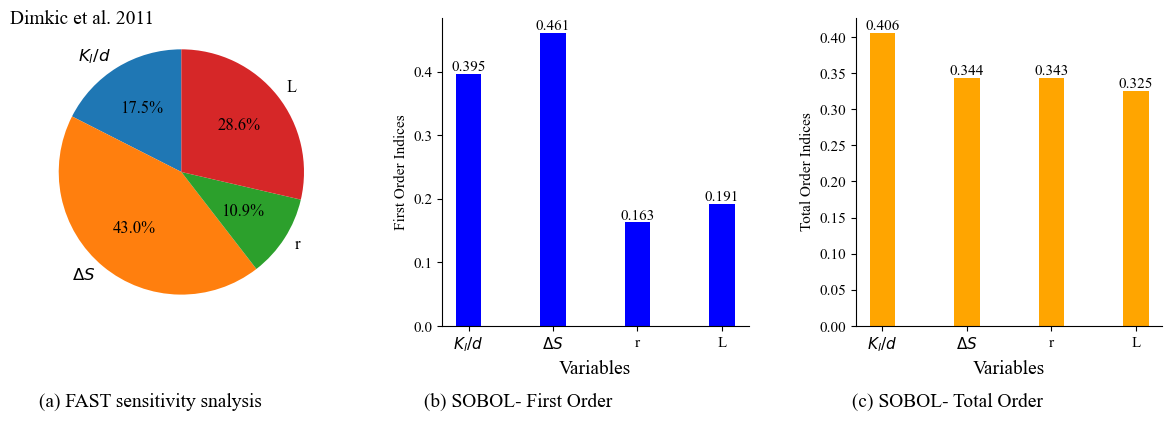

Most sensitive parameter: $\Delta S$
Least sensitive parameter: r
Parameters in descending order of sensitivity:
$K_l/d$ > $\Delta S$ > L > r
Top 3 sensitivity parameters based on combined indices: ['$K_l/d$', '$\\Delta S$', 'L']


In [4]:
# Model Name: Dimkic et al. 2011

ot.RandomGenerator.SetSeed(0)

formula = ['(K_ld)*Delta_S*2*3.141592654*r*L'] 

model = ot.SymbolicFunction(['K_ld', 'Delta_S', 'r', 'L'], formula)
distributions = [ot.Uniform(0.00025, 0.0057550), #  Representative Values of the Coefficient of Local Hydraulic Losses at Well Laterals, KL /d conductivity of the well-lateral colmated layer [L T−1]
                 ot.Uniform(0.001, 3.1), # piezometric head drop at the colmated layer, the local drawdown
                 ot.Uniform(1, 5), # radius of the well lateral [m]
                 ot.Uniform(1, 10)] # length of the well lateral [m]


distribution = ot.ComposedDistribution(distributions)
print(distribution)
sensitivityAnalysis = ot.FAST(model, distribution, 101)
print(sensitivityAnalysis.getFirstOrderIndices())

y = np.array(sensitivityAnalysis.getFirstOrderIndices())
mylab = ['$K_l/d$', r'$\Delta S$', 'r', 'L']

# FAST Analysis
hover_template = '<b>%{label}</b><br>Value: %{value:.2f}<br>Percent: %{percent:.2%}<br>First Order Index: %{text:.2E}'
fig = plt.figure(figsize=(18, 4))
gs = gridspec.GridSpec(1, 4, width_ratios=[2, 2, 2,1])

ax_pie = plt.subplot(gs[0])
ax_pie.pie(y, labels=mylab, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12})
ax_pie.set_aspect('equal')
ax_pie.text(0.4, -0.25, '(a) FAST sensitivity snalysis', ha='center', va='center', transform=ax_pie.transAxes, fontsize=14)


#SOBOL Analysis

ot.RandomGenerator.SetSeed(0)

distribution = ot.ComposedDistribution(distributions)
print(distribution)
sensitivityAnalysis = ot.SobolIndicesAlgorithm(distribution, 101, model)
print(sensitivityAnalysis.getFirstOrderIndices())

# First order index
sensitivityIndices = sensitivityAnalysis.getFirstOrderIndices()
minIndex = np.argmin(sensitivityIndices)
maxIndex = np.argmax(sensitivityIndices)
leastSensitiveVariable_first_order = mylab[minIndex]
mostSensitiveVariable_first_order = mylab[maxIndex]

# Total order index
totalOrderIndices = sensitivityAnalysis.getTotalOrderIndices()
minIndex = np.argmin(totalOrderIndices)
maxIndex = np.argmax(totalOrderIndices)
leastSensitiveVariable_total_order = mylab[minIndex]
mostSensitiveVariable_total_order = mylab[maxIndex]

y1 = np.array(sensitivityAnalysis.getFirstOrderIndices()) #defining y axis
y2 = np.array(totalOrderIndices)

# Bar Chart for First Order Indices
ax_plt1 = plt.subplot(gs[1])
bars = ax_plt1.bar(mylab, y1, color='blue', width=0.3)
#ax_plt1.set_title('First Order Indices')
ax_plt1.set_xlabel('Variables',fontsize=14)
ax_plt1.set_ylabel('First Order Indices',fontsize=11)
ax_plt1.bar_label(bars, fmt='%.3f', label_type='edge', color='black', fontsize=11)
ax_plt1.spines['top'].set_visible(False)
ax_plt1.spines['right'].set_visible(False)
ax_pie.text(1.6, -0.25, '(b) SOBOL- First Order', ha='center', va='center', transform=ax_pie.transAxes, fontsize=14)

# Bar Chart for Total Order Indices
ax_plt2 = plt.subplot(gs[2])
bars = ax_plt2.bar(mylab, y2, color='orange', width=0.3)
#ax_plt2.set_title('Total Order Indices')
ax_plt2.set_xlabel('Variables',fontsize=14)
ax_plt2.set_ylabel('Total Order Indices',fontsize=11)
ax_plt2.bar_label(bars, fmt='%.3f', label_type='edge', color='black', fontsize=11)
ax_plt2.spines['top'].set_visible(False)
ax_plt2.spines['right'].set_visible(False)
ax_pie.text(3.0, -0.25, '(c) SOBOL- Total Order', ha='center', va='center', transform=ax_pie.transAxes, fontsize=14)

# Set xlabel at the bottom for each subplot
#for ax, title in zip([ax_pie, ax_plt1, ax_plt2], ["(a) FAST sensitivity snalysis", "(b) SOBOL- First Order", "(c) SOBOL- Total Order"]):
  #  ax.set_xlabel(title)

fig.subplots_adjust(wspace=0.4)  # Adjust spacing between subplots
for ax in fig.get_axes():
    for tick in ax.xaxis.get_major_ticks():        
        tick.label.set_fontsize(11) 
        tick.label.set_color('black')
    for tick in ax.yaxis.get_major_ticks():        
        tick.label.set_fontsize(11) 
        tick.label.set_color('black')
        
plt.suptitle("Dimkic et al. 2011", x=0.155, y=.9, fontsize=14)
plt.show()
fig.savefig('C:/Users/mouly/Dropbox/Abdul_Work/Paper/Figures/Dimkic et al. 2011.jpg', dpi=300, bbox_inches='tight')

# Normalize SOBOL indices for comparison
max_sobol_first_order = np.max(sensitivityIndices)
min_sobol_first_order = np.min(sensitivityIndices)
normalized_sobol_first_order = (sensitivityIndices - min_sobol_first_order) / (max_sobol_first_order - min_sobol_first_order)

max_sobol_total_order = np.max(totalOrderIndices)
min_sobol_total_order = np.min(totalOrderIndices)
normalized_sobol_total_order = (totalOrderIndices - min_sobol_total_order) / (max_sobol_total_order - min_sobol_total_order)

# Combine FAST and normalized SOBOL indices
# Assuming equal weight for FAST and SOBOL indices
combined_indices = {
    'FAST': y,
    'SOBOL_First_Order': normalized_sobol_first_order,
    'SOBOL_Total_Order': normalized_sobol_total_order
}

# Compute average sensitivity indices for each parameter
average_sensitivity_indices = np.mean(list(combined_indices.values()), axis=0)

# Combine and rank the parameters
combined_sensitivity = sorted(zip(average_sensitivity_indices, mylab), reverse=True)

# Extract top 3 parameters
top_3_sensitivity = combined_sensitivity[:3]

# Create list of parameters ordered by combined sensitivity
ordered_parameters = ' > '.join(param for _, param in combined_sensitivity)

# Print the most and least sensitive parameters
print(f"Most sensitive parameter: {mostSensitiveVariable_first_order}")
print(f"Least sensitive parameter: {leastSensitiveVariable_first_order}")

# Print the parameters in descending order of sensitivity
print("Parameters in descending order of sensitivity:")
print(ordered_parameters)

# Print Top 3 Sensitivity Parameters
print(f"Top 3 sensitivity parameters based on combined indices: {[param for _, param in top_3_sensitivity]}")


# Store results in variables
most_sensitive_variable = mostSensitiveVariable_first_order
least_sensitive_variable = leastSensitiveVariable_first_order
top_3_parameters = ' > '.join([param for _, param in top_3_sensitivity])
ordered_parameters = ' > '.join(param for _, param in combined_sensitivity)

# Function to write results to file
def write_results_to_file(model_name, formula, distributions, most_sensitive_variable, least_sensitive_variable, top_3_parameters, ordered_parameters):
    # Convert distributions to a readable format
    param_ranges = {f'distribution_{i}': f"{dist.getRange().getLowerBound()[0]} - {dist.getRange().getUpperBound()[0]}" for i, dist in enumerate(distributions)}

    # Prepare the results to write
    results = (
        f"Model Name: {model_name}\n"
        f"Formula: {formula[0]}\n"
        f"Parameter Ranges: {param_ranges}\n"
        f"Most sensitive parameter: {most_sensitive_variable}\n"
        f"Least sensitive parameter: {least_sensitive_variable}\n"
        f"Top 3 sensitivity parameters based on combined indices: {top_3_parameters}\n"
        f"Parameters in descending order of sensitivity: {ordered_parameters}\n"
        "\n"
    )

    # Check if the model's results already exist in the file
    if os.path.exists('results.txt'):
        with open('results.txt', 'r') as f:
            content = f.read()
        if results not in content:
            with open('results.txt', 'a') as f:
                f.write(results)
    else:
        with open('results.txt', 'w') as f:
            f.write(results)

# Extract the current cell source code
ipython = get_ipython()
cell_source = ipython.history_manager.input_hist_parsed[-1]

# Extract model name from the first comment
model_name = ""
for line in cell_source.split('\n'):
    if line.startswith("# Model Name:"):
        model_name = line.split(": ")[1].strip()
        break

# Write results to results.txt
write_results_to_file(model_name, formula, distributions, most_sensitive_variable, least_sensitive_variable, top_3_parameters, ordered_parameters)


ComposedDistribution(Uniform(a = 0.017, b = 7.13), Uniform(a = 0.1, b = 1), Uniform(a = 0.15, b = 0.2), Uniform(a = 0.0001, b = 0.01), Uniform(a = 0.065, b = 0.136), Uniform(a = 1, b = 30), Uniform(a = 0.03, b = 1.15), Uniform(a = 130, b = 270), IndependentCopula(dimension = 8))
[0.30394,0.0120955,0.0122451,0.561818,0.0455118,0.434464,0.0286688,0.0258875]
ComposedDistribution(Uniform(a = 0.017, b = 7.13), Uniform(a = 0.1, b = 1), Uniform(a = 0.15, b = 0.2), Uniform(a = 0.0001, b = 0.01), Uniform(a = 0.065, b = 0.136), Uniform(a = 1, b = 30), Uniform(a = 0.03, b = 1.15), Uniform(a = 130, b = 270), IndependentCopula(dimension = 8))
[0.0639989,0.0445164,0.0792644,0.461832,0.0337515,0.174649,0.0671645,0.0669072]


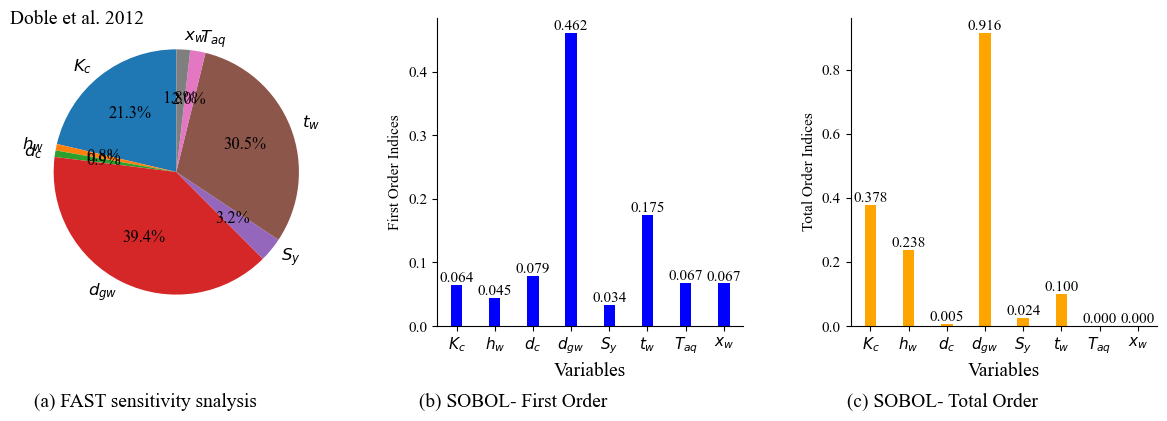

Most sensitive parameter: $d_{gw}$
Least sensitive parameter: $S_y$
Parameters in descending order of sensitivity:
$d_{gw}$ > $t_w$ > $K_c$ > $h_w$ > $d_c$ > $T_{aq}$ > $x_w$ > $S_y$
Top 3 sensitivity parameters based on combined indices: ['$d_{gw}$', '$t_w$', '$K_c$']


In [5]:
# Model Name:  Doble et al., 2012
ot.RandomGenerator.SetSeed(0)

formula = ['(Kc(hw + dc))/(dc*dgw*((Sy/tw)+((2*Taq)/(xw*xw))))']

model = ot.SymbolicFunction(['Kc', 'hw', 'dc', 'dgw', 'Sy', 'tw', 'Taq', 'xw'], formula)
distributions = [ot.Uniform(0.017, 7.13), #  Saturated hydraulic conductivity of the surface soil or clogging layer [LT-1]
                 ot.Uniform(0.1, 1), #  height of the wave above the bankfull elevation
                 ot.Uniform(0.15, 0.2), # Thickness of the clogging layer
                 ot.Uniform(1e-4, 1e-2), # depth of groundwater = taken at the centre of the flood wave extent
                 ot.Uniform(0.065, 0.136), # Aquifer specific yield
                 ot.Uniform(1, 30), # duration of the flood wave
                 ot.Uniform(0.03, 1.15), #  Aquifer transmissivity
                 ot.Uniform(130, 270)] # lateral extent of flooding

distribution = ot.ComposedDistribution(distributions)
print(distribution)
sensitivityAnalysis = ot.FAST(model, distribution, 101)
print(sensitivityAnalysis.getFirstOrderIndices())

y = np.array(sensitivityAnalysis.getFirstOrderIndices())
mylab = ['$K_c$', '$h_w$', '$d_c$', '$d_{gw}$', '$S_y$', '$t_w$', '$T_{aq}$', '$x_w$']

# FAST Analysis
hover_template = '<b>%{label}</b><br>Value: %{value:.2f}<br>Percent: %{percent:.2%}<br>First Order Index: %{text:.2E}'
fig = plt.figure(figsize=(18, 4))
gs = gridspec.GridSpec(1, 4, width_ratios=[2, 2, 2,1])

ax_pie = plt.subplot(gs[0])
ax_pie.pie(y, labels=mylab, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12})
ax_pie.set_aspect('equal')
ax_pie.text(0.4, -0.25, '(a) FAST sensitivity snalysis', ha='center', va='center', transform=ax_pie.transAxes, fontsize=14)


#SOBOL Analysis

ot.RandomGenerator.SetSeed(0)

distribution = ot.ComposedDistribution(distributions)
print(distribution)
sensitivityAnalysis = ot.SobolIndicesAlgorithm(distribution, 101, model)
print(sensitivityAnalysis.getFirstOrderIndices())

# First order index
sensitivityIndices = sensitivityAnalysis.getFirstOrderIndices()
minIndex = np.argmin(sensitivityIndices)
maxIndex = np.argmax(sensitivityIndices)
leastSensitiveVariable_first_order = mylab[minIndex]
mostSensitiveVariable_first_order = mylab[maxIndex]

# Total order index
totalOrderIndices = sensitivityAnalysis.getTotalOrderIndices()
minIndex = np.argmin(totalOrderIndices)
maxIndex = np.argmax(totalOrderIndices)
leastSensitiveVariable_total_order = mylab[minIndex]
mostSensitiveVariable_total_order = mylab[maxIndex]

y1 = np.array(sensitivityAnalysis.getFirstOrderIndices()) #defining y axis
y2 = np.array(totalOrderIndices)

# Bar Chart for First Order Indices
ax_plt1 = plt.subplot(gs[1])
bars = ax_plt1.bar(mylab, y1, color='blue', width=0.3)
#ax_plt1.set_title('First Order Indices')
ax_plt1.set_xlabel('Variables',fontsize=14)
ax_plt1.set_ylabel('First Order Indices',fontsize=11)
ax_plt1.bar_label(bars, fmt='%.3f', label_type='edge', color='black', fontsize=11)
ax_plt1.spines['top'].set_visible(False)
ax_plt1.spines['right'].set_visible(False)
ax_pie.text(1.6, -0.25, '(b) SOBOL- First Order', ha='center', va='center', transform=ax_pie.transAxes, fontsize=14)

# Bar Chart for Total Order Indices
ax_plt2 = plt.subplot(gs[2])
bars = ax_plt2.bar(mylab, y2, color='orange', width=0.3)
#ax_plt2.set_title('Total Order Indices')
ax_plt2.set_xlabel('Variables',fontsize=14)
ax_plt2.set_ylabel('Total Order Indices',fontsize=11)
ax_plt2.bar_label(bars, fmt='%.3f', label_type='edge', color='black', fontsize=11)
ax_plt2.spines['top'].set_visible(False)
ax_plt2.spines['right'].set_visible(False)
ax_pie.text(3.0, -0.25, '(c) SOBOL- Total Order', ha='center', va='center', transform=ax_pie.transAxes, fontsize=14)

# Set xlabel at the bottom for each subplot
fig.subplots_adjust(wspace=0.4)  # Adjust spacing between subplots
for ax in fig.get_axes():
    for tick in ax.xaxis.get_major_ticks():        
        tick.label.set_fontsize(11) 
        tick.label.set_color('black')
    for tick in ax.yaxis.get_major_ticks():        
        tick.label.set_fontsize(11) 
        tick.label.set_color('black')
        
plt.suptitle("Doble et al. 2012", x=0.155, y=.9, fontsize=14)
plt.show()
fig.savefig('C:/Users/mouly/Dropbox/Abdul_Work/Paper/Figures/Doble et al. 2012.jpg', dpi=300, bbox_inches='tight')

# Normalize SOBOL indices for comparison
max_sobol_first_order = np.max(sensitivityIndices)
min_sobol_first_order = np.min(sensitivityIndices)
normalized_sobol_first_order = (sensitivityIndices - min_sobol_first_order) / (max_sobol_first_order - min_sobol_first_order)

max_sobol_total_order = np.max(totalOrderIndices)
min_sobol_total_order = np.min(totalOrderIndices)
normalized_sobol_total_order = (totalOrderIndices - min_sobol_total_order) / (max_sobol_total_order - min_sobol_total_order)

# Combine FAST and normalized SOBOL indices
# Assuming equal weight for FAST and SOBOL indices
combined_indices = {
    'FAST': y,
    'SOBOL_First_Order': normalized_sobol_first_order,
    'SOBOL_Total_Order': normalized_sobol_total_order
}

# Compute average sensitivity indices for each parameter
average_sensitivity_indices = np.mean(list(combined_indices.values()), axis=0)

# Combine and rank the parameters
combined_sensitivity = sorted(zip(average_sensitivity_indices, mylab), reverse=True)

# Extract top 3 parameters
top_3_sensitivity = combined_sensitivity[:3]

# Create list of parameters ordered by combined sensitivity
ordered_parameters = ' > '.join(param for _, param in combined_sensitivity)

# Print the most and least sensitive parameters
print(f"Most sensitive parameter: {mostSensitiveVariable_first_order}")
print(f"Least sensitive parameter: {leastSensitiveVariable_first_order}")

# Print the parameters in descending order of sensitivity
print("Parameters in descending order of sensitivity:")
print(ordered_parameters)

# Print Top 3 Sensitivity Parameters
print(f"Top 3 sensitivity parameters based on combined indices: {[param for _, param in top_3_sensitivity]}")


# Store results in variables
most_sensitive_variable = mostSensitiveVariable_first_order
least_sensitive_variable = leastSensitiveVariable_first_order
top_3_parameters = ' > '.join([param for _, param in top_3_sensitivity])
ordered_parameters = ' > '.join(param for _, param in combined_sensitivity)

# Function to write results to file
def write_results_to_file(model_name, formula, distributions, most_sensitive_variable, least_sensitive_variable, top_3_parameters, ordered_parameters):
    # Convert distributions to a readable format
    param_ranges = {f'distribution_{i}': f"{dist.getRange().getLowerBound()[0]} - {dist.getRange().getUpperBound()[0]}" for i, dist in enumerate(distributions)}

    # Prepare the results to write
    results = (
        f"Model Name: {model_name}\n"
        f"Formula: {formula[0]}\n"
        f"Parameter Ranges: {param_ranges}\n"
        f"Most sensitive parameter: {most_sensitive_variable}\n"
        f"Least sensitive parameter: {least_sensitive_variable}\n"
        f"Top 3 sensitivity parameters based on combined indices: {top_3_parameters}\n"
        f"Parameters in descending order of sensitivity: {ordered_parameters}\n"
        "\n"
    )

    # Check if the model's results already exist in the file
    if os.path.exists('results.txt'):
        with open('results.txt', 'r') as f:
            content = f.read()
        if results not in content:
            with open('results.txt', 'a') as f:
                f.write(results)
    else:
        with open('results.txt', 'w') as f:
            f.write(results)

# Extract the current cell source code
ipython = get_ipython()
cell_source = ipython.history_manager.input_hist_parsed[-1]

# Extract model name from the first comment
model_name = ""
for line in cell_source.split('\n'):
    if line.startswith("# Model Name:"):
        model_name = line.split(": ")[1].strip()
        break

# Write results to results.txt
write_results_to_file(model_name, formula, distributions, most_sensitive_variable, least_sensitive_variable, top_3_parameters, ordered_parameters)


ComposedDistribution(Uniform(a = 1e-10, b = 0.1), Uniform(a = 0.005, b = 0.1), Uniform(a = 1, b = 5), Uniform(a = 1, b = 10), IndependentCopula(dimension = 4))
[0.220088,0.116943,0.0787454,0.434801]
ComposedDistribution(Uniform(a = 1e-10, b = 0.1), Uniform(a = 0.005, b = 0.1), Uniform(a = 1, b = 5), Uniform(a = 1, b = 10), IndependentCopula(dimension = 4))
[0.137511,0.250156,0.252103,0.337756]


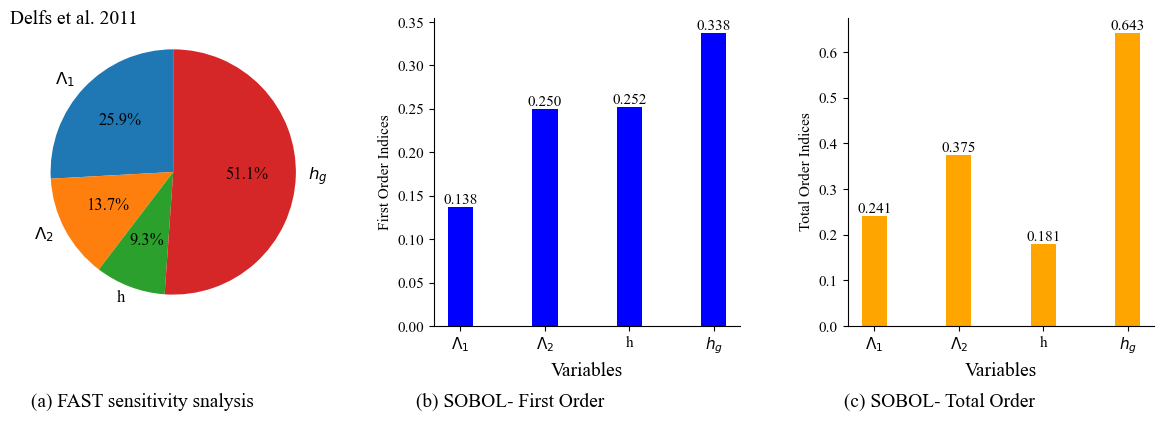

Most sensitive parameter: $h_g$
Least sensitive parameter: $\Lambda_1$
Parameters in descending order of sensitivity:
$h_g$ > $\Lambda_2$ > h > $\Lambda_1$
Top 3 sensitivity parameters based on combined indices: ['$h_g$', '$\\Lambda_2$', 'h']


In [6]:
# Model Name: Delfs et al. 2011

ot.RandomGenerator.SetSeed(0)

formula = ['lambda_1*(2.71828128*(lambda_2*(h-hg)))'] 

model = ot.SymbolicFunction(['lambda_1', 'lambda_2', 'h', 'hg'], formula)
distributions = [ot.Uniform(1e-10, 1e-1), # Λ1 and Λ2 are parameters and implemented into OGS code.
                 ot.Uniform(0.005, 0.1), 
                 ot.Uniform(1, 5), # h = H + b the water height in the river
                 ot.Uniform(1, 10)] # water table height

distribution = ot.ComposedDistribution(distributions)
print(distribution)
sensitivityAnalysis = ot.FAST(model, distribution, 101)
print(sensitivityAnalysis.getFirstOrderIndices())

y = np.array(sensitivityAnalysis.getFirstOrderIndices())
mylab = [r'$\Lambda_1$', r'$\Lambda_2$', 'h', '$h_g$']

# FAST Analysis
hover_template = '<b>%{label}</b><br>Value: %{value:.2f}<br>Percent: %{percent:.2%}<br>First Order Index: %{text:.2E}'
fig = plt.figure(figsize=(18, 4))
gs = gridspec.GridSpec(1, 4, width_ratios=[2, 2, 2,1])

ax_pie = plt.subplot(gs[0])
ax_pie.pie(y, labels=mylab, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12})
ax_pie.set_aspect('equal')
ax_pie.text(0.4, -0.25, '(a) FAST sensitivity snalysis', ha='center', va='center', transform=ax_pie.transAxes, fontsize=14)


#SOBOL Analysis

ot.RandomGenerator.SetSeed(0)

distribution = ot.ComposedDistribution(distributions)
print(distribution)
sensitivityAnalysis = ot.SobolIndicesAlgorithm(distribution, 101, model)
print(sensitivityAnalysis.getFirstOrderIndices())

# First order index
sensitivityIndices = sensitivityAnalysis.getFirstOrderIndices()
minIndex = np.argmin(sensitivityIndices)
maxIndex = np.argmax(sensitivityIndices)
leastSensitiveVariable_first_order = mylab[minIndex]
mostSensitiveVariable_first_order = mylab[maxIndex]

# Total order index
totalOrderIndices = sensitivityAnalysis.getTotalOrderIndices()
minIndex = np.argmin(totalOrderIndices)
maxIndex = np.argmax(totalOrderIndices)
leastSensitiveVariable_total_order = mylab[minIndex]
mostSensitiveVariable_total_order = mylab[maxIndex]

y1 = np.array(sensitivityAnalysis.getFirstOrderIndices()) #defining y axis
y2 = np.array(totalOrderIndices)

# Bar Chart for First Order Indices
ax_plt1 = plt.subplot(gs[1])
bars = ax_plt1.bar(mylab, y1, color='blue', width=0.3)
#ax_plt1.set_title('First Order Indices')
ax_plt1.set_xlabel('Variables',fontsize=14)
ax_plt1.set_ylabel('First Order Indices',fontsize=11)
ax_plt1.bar_label(bars, fmt='%.3f', label_type='edge', color='black', fontsize=11)
ax_plt1.spines['top'].set_visible(False)
ax_plt1.spines['right'].set_visible(False)
ax_pie.text(1.6, -0.25, '(b) SOBOL- First Order', ha='center', va='center', transform=ax_pie.transAxes, fontsize=14)

# Bar Chart for Total Order Indices
ax_plt2 = plt.subplot(gs[2])
bars = ax_plt2.bar(mylab, y2, color='orange', width=0.3)
#ax_plt2.set_title('Total Order Indices')
ax_plt2.set_xlabel('Variables',fontsize=14)
ax_plt2.set_ylabel('Total Order Indices',fontsize=11)
ax_plt2.bar_label(bars, fmt='%.3f', label_type='edge', color='black', fontsize=11)
ax_plt2.spines['top'].set_visible(False)
ax_plt2.spines['right'].set_visible(False)
ax_pie.text(3.0, -0.25, '(c) SOBOL- Total Order', ha='center', va='center', transform=ax_pie.transAxes, fontsize=14)

# Set xlabel at the bottom for each subplot
fig.subplots_adjust(wspace=0.4)  # Adjust spacing between subplots
for ax in fig.get_axes():
    for tick in ax.xaxis.get_major_ticks():        
        tick.label.set_fontsize(11) 
        tick.label.set_color('black')
    for tick in ax.yaxis.get_major_ticks():        
        tick.label.set_fontsize(11) 
        tick.label.set_color('black')
        
plt.suptitle("Delfs et al. 2011", x=0.155, y=.9, fontsize=14)
plt.show()
fig.savefig('C:/Users/mouly/Dropbox/Abdul_Work/Paper/Figures/Delfs et al. 2011.jpg', dpi=300, bbox_inches='tight')

# Normalize SOBOL indices for comparison
max_sobol_first_order = np.max(sensitivityIndices)
min_sobol_first_order = np.min(sensitivityIndices)
normalized_sobol_first_order = (sensitivityIndices - min_sobol_first_order) / (max_sobol_first_order - min_sobol_first_order)

max_sobol_total_order = np.max(totalOrderIndices)
min_sobol_total_order = np.min(totalOrderIndices)
normalized_sobol_total_order = (totalOrderIndices - min_sobol_total_order) / (max_sobol_total_order - min_sobol_total_order)

# Combine FAST and normalized SOBOL indices
# Assuming equal weight for FAST and SOBOL indices
combined_indices = {
    'FAST': y,
    'SOBOL_First_Order': normalized_sobol_first_order,
    'SOBOL_Total_Order': normalized_sobol_total_order
}

# Compute average sensitivity indices for each parameter
average_sensitivity_indices = np.mean(list(combined_indices.values()), axis=0)

# Combine and rank the parameters
combined_sensitivity = sorted(zip(average_sensitivity_indices, mylab), reverse=True)

# Extract top 3 parameters
top_3_sensitivity = combined_sensitivity[:3]

# Create list of parameters ordered by combined sensitivity
ordered_parameters = ' > '.join(param for _, param in combined_sensitivity)

# Print the most and least sensitive parameters
print(f"Most sensitive parameter: {mostSensitiveVariable_first_order}")
print(f"Least sensitive parameter: {leastSensitiveVariable_first_order}")

# Print the parameters in descending order of sensitivity
print("Parameters in descending order of sensitivity:")
print(ordered_parameters)

# Print Top 3 Sensitivity Parameters
print(f"Top 3 sensitivity parameters based on combined indices: {[param for _, param in top_3_sensitivity]}")


# Store results in variables
most_sensitive_variable = mostSensitiveVariable_first_order
least_sensitive_variable = leastSensitiveVariable_first_order
top_3_parameters = ' > '.join([param for _, param in top_3_sensitivity])
ordered_parameters = ' > '.join(param for _, param in combined_sensitivity)

# Function to write results to file
def write_results_to_file(model_name, formula, distributions, most_sensitive_variable, least_sensitive_variable, top_3_parameters, ordered_parameters):
    # Convert distributions to a readable format
    param_ranges = {f'distribution_{i}': f"{dist.getRange().getLowerBound()[0]} - {dist.getRange().getUpperBound()[0]}" for i, dist in enumerate(distributions)}

    # Prepare the results to write
    results = (
        f"Model Name: {model_name}\n"
        f"Formula: {formula[0]}\n"
        f"Parameter Ranges: {param_ranges}\n"
        f"Most sensitive parameter: {most_sensitive_variable}\n"
        f"Least sensitive parameter: {least_sensitive_variable}\n"
        f"Top 3 sensitivity parameters based on combined indices: {top_3_parameters}\n"
        f"Parameters in descending order of sensitivity: {ordered_parameters}\n"
        "\n"
    )

    # Check if the model's results already exist in the file
    if os.path.exists('results.txt'):
        with open('results.txt', 'r') as f:
            content = f.read()
        if results not in content:
            with open('results.txt', 'a') as f:
                f.write(results)
    else:
        with open('results.txt', 'w') as f:
            f.write(results)

# Extract the current cell source code
ipython = get_ipython()
cell_source = ipython.history_manager.input_hist_parsed[-1]

# Extract model name from the first comment
model_name = ""
for line in cell_source.split('\n'):
    if line.startswith("# Model Name:"):
        model_name = line.split(": ")[1].strip()
        break

# Write results to results.txt
write_results_to_file(model_name, formula, distributions, most_sensitive_variable, least_sensitive_variable, top_3_parameters, ordered_parameters)


ComposedDistribution(Uniform(a = 1e-12, b = 1), Uniform(a = 1, b = 10), Uniform(a = 0.1, b = 50), IndependentCopula(dimension = 3))
[0.0690113,0.159831,0.454331]
ComposedDistribution(Uniform(a = 1e-12, b = 1), Uniform(a = 1, b = 10), Uniform(a = 0.1, b = 50), IndependentCopula(dimension = 3))
[-0.0438464,-0.0496101,0.564772]


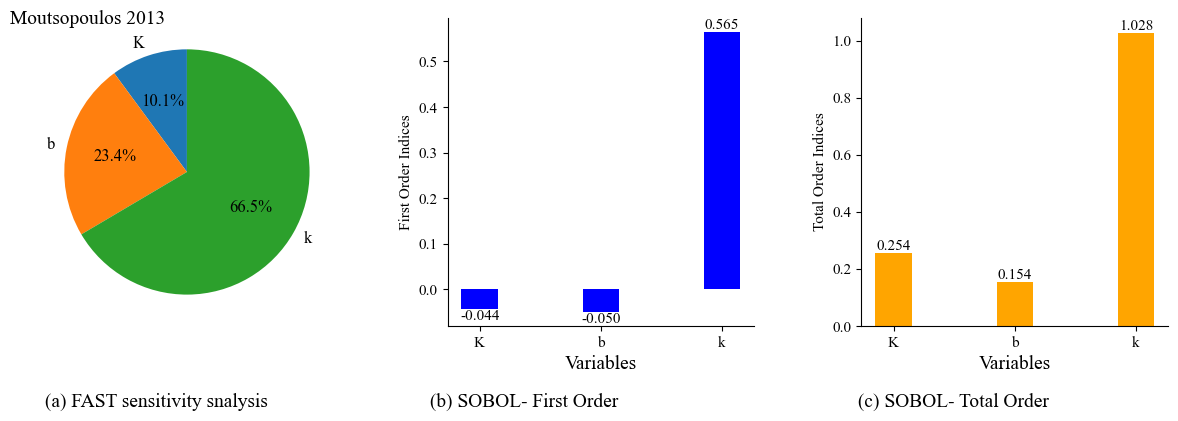

Most sensitive parameter: k
Least sensitive parameter: b
Parameters in descending order of sensitivity:
k > K > b
Top 3 sensitivity parameters based on combined indices: ['k', 'K', 'b']


In [7]:
# Model Name: Moutsopoulos 2013

ot.RandomGenerator.SetSeed(0)

formula = ['(K*b)/k'] 

model = ot.SymbolicFunction(['K', 'b', 'k'], formula)
distributions = [ot.Uniform(1e-12, 1e0), # hydraulic conductivity of the aquifer 
                 ot.Uniform(1, 10), # length of the base of semipervious layer of rectangular shape
                 ot.Uniform(0.1, 50)] # the hydraulic conductivity of the clogging layer (m/d).
distribution = ot.ComposedDistribution(distributions)

distribution = ot.ComposedDistribution(distributions)
print(distribution)
sensitivityAnalysis = ot.FAST(model, distribution, 101)
print(sensitivityAnalysis.getFirstOrderIndices())

y = np.array(sensitivityAnalysis.getFirstOrderIndices())
mylab = ['K', 'b', 'k']

# FAST Analysis
hover_template = '<b>%{label}</b><br>Value: %{value:.2f}<br>Percent: %{percent:.2%}<br>First Order Index: %{text:.2E}'
fig = plt.figure(figsize=(18, 4))
gs = gridspec.GridSpec(1, 4, width_ratios=[2, 2, 2,1])

ax_pie = plt.subplot(gs[0])
ax_pie.pie(y, labels=mylab, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12})
ax_pie.set_aspect('equal')
ax_pie.text(0.4, -0.25, '(a) FAST sensitivity snalysis', ha='center', va='center', transform=ax_pie.transAxes, fontsize=14)


#SOBOL Analysis

ot.RandomGenerator.SetSeed(0)

distribution = ot.ComposedDistribution(distributions)
print(distribution)
sensitivityAnalysis = ot.SobolIndicesAlgorithm(distribution, 101, model)
print(sensitivityAnalysis.getFirstOrderIndices())

# First order index
sensitivityIndices = sensitivityAnalysis.getFirstOrderIndices()
minIndex = np.argmin(sensitivityIndices)
maxIndex = np.argmax(sensitivityIndices)
leastSensitiveVariable_first_order = mylab[minIndex]
mostSensitiveVariable_first_order = mylab[maxIndex]

# Total order index
totalOrderIndices = sensitivityAnalysis.getTotalOrderIndices()
minIndex = np.argmin(totalOrderIndices)
maxIndex = np.argmax(totalOrderIndices)
leastSensitiveVariable_total_order = mylab[minIndex]
mostSensitiveVariable_total_order = mylab[maxIndex]

y1 = np.array(sensitivityAnalysis.getFirstOrderIndices()) #defining y axis
y2 = np.array(totalOrderIndices)

# Bar Chart for First Order Indices
ax_plt1 = plt.subplot(gs[1])
bars = ax_plt1.bar(mylab, y1, color='blue', width=0.3)
#ax_plt1.set_title('First Order Indices')
ax_plt1.set_xlabel('Variables',fontsize=14)
ax_plt1.set_ylabel('First Order Indices',fontsize=11)
ax_plt1.bar_label(bars, fmt='%.3f', label_type='edge', color='black', fontsize=11)
ax_plt1.spines['top'].set_visible(False)
ax_plt1.spines['right'].set_visible(False)
ax_pie.text(1.6, -0.25, '(b) SOBOL- First Order', ha='center', va='center', transform=ax_pie.transAxes, fontsize=14)

# Bar Chart for Total Order Indices
ax_plt2 = plt.subplot(gs[2])
bars = ax_plt2.bar(mylab, y2, color='orange', width=0.3)
#ax_plt2.set_title('Total Order Indices')
ax_plt2.set_xlabel('Variables',fontsize=14)
ax_plt2.set_ylabel('Total Order Indices',fontsize=11)
ax_plt2.bar_label(bars, fmt='%.3f', label_type='edge', color='black', fontsize=11)
ax_plt2.spines['top'].set_visible(False)
ax_plt2.spines['right'].set_visible(False)
ax_pie.text(3.0, -0.25, '(c) SOBOL- Total Order', ha='center', va='center', transform=ax_pie.transAxes, fontsize=14)

# Set xlabel at the bottom for each subplot
fig.subplots_adjust(wspace=0.4)  # Adjust spacing between subplots
for ax in fig.get_axes():
    for tick in ax.xaxis.get_major_ticks():        
        tick.label.set_fontsize(11) 
        tick.label.set_color('black')
    for tick in ax.yaxis.get_major_ticks():        
        tick.label.set_fontsize(11) 
        tick.label.set_color('black')
        
plt.suptitle("Moutsopoulos 2013", x=0.155, y=.9, fontsize=14)
plt.show()
fig.savefig('C:/Users/mouly/Dropbox/Abdul_Work/Paper/Figures/Moutsopoulos 2013.jpg', dpi=300, bbox_inches='tight')

# Normalize SOBOL indices for comparison
max_sobol_first_order = np.max(sensitivityIndices)
min_sobol_first_order = np.min(sensitivityIndices)
normalized_sobol_first_order = (sensitivityIndices - min_sobol_first_order) / (max_sobol_first_order - min_sobol_first_order)

max_sobol_total_order = np.max(totalOrderIndices)
min_sobol_total_order = np.min(totalOrderIndices)
normalized_sobol_total_order = (totalOrderIndices - min_sobol_total_order) / (max_sobol_total_order - min_sobol_total_order)

# Combine FAST and normalized SOBOL indices
# Assuming equal weight for FAST and SOBOL indices
combined_indices = {
    'FAST': y,
    'SOBOL_First_Order': normalized_sobol_first_order,
    'SOBOL_Total_Order': normalized_sobol_total_order
}

# Compute average sensitivity indices for each parameter
average_sensitivity_indices = np.mean(list(combined_indices.values()), axis=0)

# Combine and rank the parameters
combined_sensitivity = sorted(zip(average_sensitivity_indices, mylab), reverse=True)

# Extract top 3 parameters
top_3_sensitivity = combined_sensitivity[:3]

# Create list of parameters ordered by combined sensitivity
ordered_parameters = ' > '.join(param for _, param in combined_sensitivity)

# Print the most and least sensitive parameters
print(f"Most sensitive parameter: {mostSensitiveVariable_first_order}")
print(f"Least sensitive parameter: {leastSensitiveVariable_first_order}")

# Print the parameters in descending order of sensitivity
print("Parameters in descending order of sensitivity:")
print(ordered_parameters)

# Print Top 3 Sensitivity Parameters
print(f"Top 3 sensitivity parameters based on combined indices: {[param for _, param in top_3_sensitivity]}")


# Store results in variables
most_sensitive_variable = mostSensitiveVariable_first_order
least_sensitive_variable = leastSensitiveVariable_first_order
top_3_parameters = ' > '.join([param for _, param in top_3_sensitivity])
ordered_parameters = ' > '.join(param for _, param in combined_sensitivity)

# Function to write results to file
def write_results_to_file(model_name, formula, distributions, most_sensitive_variable, least_sensitive_variable, top_3_parameters, ordered_parameters):
    # Convert distributions to a readable format
    param_ranges = {f'distribution_{i}': f"{dist.getRange().getLowerBound()[0]} - {dist.getRange().getUpperBound()[0]}" for i, dist in enumerate(distributions)}

    # Prepare the results to write
    results = (
        f"Model Name: {model_name}\n"
        f"Formula: {formula[0]}\n"
        f"Parameter Ranges: {param_ranges}\n"
        f"Most sensitive parameter: {most_sensitive_variable}\n"
        f"Least sensitive parameter: {least_sensitive_variable}\n"
        f"Top 3 sensitivity parameters based on combined indices: {top_3_parameters}\n"
        f"Parameters in descending order of sensitivity: {ordered_parameters}\n"
        "\n"
    )

    # Check if the model's results already exist in the file
    if os.path.exists('results.txt'):
        with open('results.txt', 'r') as f:
            content = f.read()
        if results not in content:
            with open('results.txt', 'a') as f:
                f.write(results)
    else:
        with open('results.txt', 'w') as f:
            f.write(results)

# Extract the current cell source code
ipython = get_ipython()
cell_source = ipython.history_manager.input_hist_parsed[-1]

# Extract model name from the first comment
model_name = ""
for line in cell_source.split('\n'):
    if line.startswith("# Model Name:"):
        model_name = line.split(": ")[1].strip()
        break

# Write results to results.txt
write_results_to_file(model_name, formula, distributions, most_sensitive_variable, least_sensitive_variable, top_3_parameters, ordered_parameters)


ComposedDistribution(Uniform(a = 10, b = 16.64), Uniform(a = 0.2, b = 0.3), Uniform(a = 0.28, b = 0.4), IndependentCopula(dimension = 3))
[0.062122,0.638175,0.610043]
ComposedDistribution(Uniform(a = 10, b = 16.64), Uniform(a = 0.2, b = 0.3), Uniform(a = 0.28, b = 0.4), IndependentCopula(dimension = 3))
[0.0741025,0.35991,0.515678]


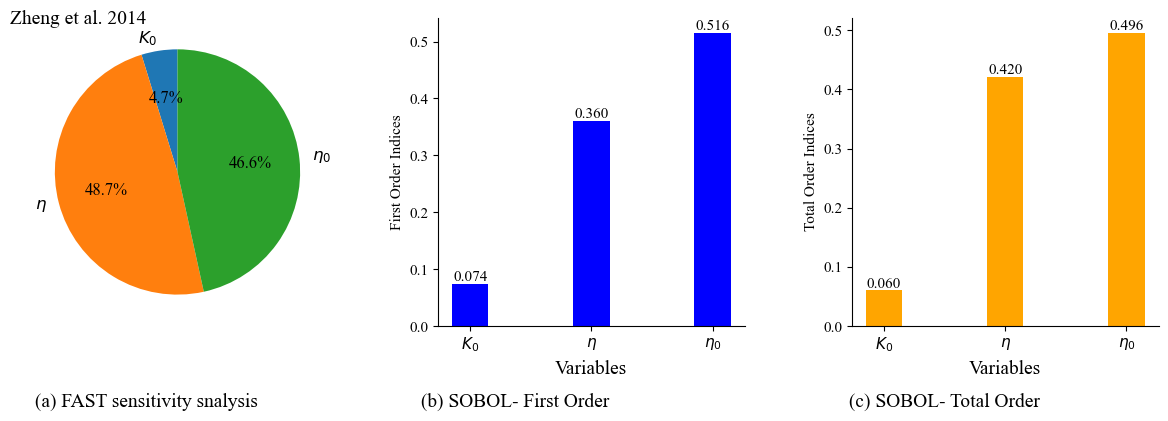

Most sensitive parameter: $\eta_0$
Least sensitive parameter: $K_0$
Parameters in descending order of sensitivity:
$\eta_0$ > $\eta$ > $K_0$
Top 3 sensitivity parameters based on combined indices: ['$\\eta_0$', '$\\eta$', '$K_0$']


In [8]:
# Model Name: Zheng et al.2014
ot.RandomGenerator.SetSeed(0)
formula = ['(K0 * ((n*n*n)/((1-n)*(1-n)))*(((1-n0)*(1-n0))/(n0*n0*n0)))']

model = ot.SymbolicFunction(['K0', 'n', 'n0'], formula)
distributions = [ot.Uniform(10,16.64),  # initial saturated permeability coefficient before recharge during recharge [m/d]
                 ot.Uniform(0.2, 0.3),  # porosity of the sand media [-]
                 ot.Uniform(0.28, 0.4)]  # initial porosity of aquifer media [-]
                
distribution = ot.ComposedDistribution(distributions)
print(distribution)
sensitivityAnalysis = ot.FAST(model, distribution, 101)
print(sensitivityAnalysis.getFirstOrderIndices())

y = np.array(sensitivityAnalysis.getFirstOrderIndices())
mylab = ['$K_0$', r'$\eta$', r'$\eta_0$']

# FAST Analysis
hover_template = '<b>%{label}</b><br>Value: %{value:.2f}<br>Percent: %{percent:.2%}<br>First Order Index: %{text:.2E}'
fig = plt.figure(figsize=(18, 4))
gs = gridspec.GridSpec(1, 4, width_ratios=[2, 2, 2,1])

ax_pie = plt.subplot(gs[0])
ax_pie.pie(y, labels=mylab, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12})
ax_pie.set_aspect('equal')
ax_pie.text(0.4, -0.25, '(a) FAST sensitivity snalysis', ha='center', va='center', transform=ax_pie.transAxes, fontsize=14)


#SOBOL Analysis

ot.RandomGenerator.SetSeed(0)

distribution = ot.ComposedDistribution(distributions)
print(distribution)
sensitivityAnalysis = ot.SobolIndicesAlgorithm(distribution, 101, model)
print(sensitivityAnalysis.getFirstOrderIndices())

# First order index
sensitivityIndices = sensitivityAnalysis.getFirstOrderIndices()
minIndex = np.argmin(sensitivityIndices)
maxIndex = np.argmax(sensitivityIndices)
leastSensitiveVariable_first_order = mylab[minIndex]
mostSensitiveVariable_first_order = mylab[maxIndex]

# Total order index
totalOrderIndices = sensitivityAnalysis.getTotalOrderIndices()
minIndex = np.argmin(totalOrderIndices)
maxIndex = np.argmax(totalOrderIndices)
leastSensitiveVariable_total_order = mylab[minIndex]
mostSensitiveVariable_total_order = mylab[maxIndex]

y1 = np.array(sensitivityAnalysis.getFirstOrderIndices()) #defining y axis
y2 = np.array(totalOrderIndices)

# Bar Chart for First Order Indices
ax_plt1 = plt.subplot(gs[1])
bars = ax_plt1.bar(mylab, y1, color='blue', width=0.3)
#ax_plt1.set_title('First Order Indices')
ax_plt1.set_xlabel('Variables',fontsize=14)
ax_plt1.set_ylabel('First Order Indices',fontsize=11)
ax_plt1.bar_label(bars, fmt='%.3f', label_type='edge', color='black', fontsize=11)
ax_plt1.spines['top'].set_visible(False)
ax_plt1.spines['right'].set_visible(False)
ax_pie.text(1.6, -0.25, '(b) SOBOL- First Order', ha='center', va='center', transform=ax_pie.transAxes, fontsize=14)

# Bar Chart for Total Order Indices
ax_plt2 = plt.subplot(gs[2])
bars = ax_plt2.bar(mylab, y2, color='orange', width=0.3)
#ax_plt2.set_title('Total Order Indices')
ax_plt2.set_xlabel('Variables',fontsize=14)
ax_plt2.set_ylabel('Total Order Indices',fontsize=11)
ax_plt2.bar_label(bars, fmt='%.3f', label_type='edge', color='black', fontsize=11)
ax_plt2.spines['top'].set_visible(False)
ax_plt2.spines['right'].set_visible(False)
ax_pie.text(3.0, -0.25, '(c) SOBOL- Total Order', ha='center', va='center', transform=ax_pie.transAxes, fontsize=14)

# Set xlabel at the bottom for each subplot
fig.subplots_adjust(wspace=0.4)  # Adjust spacing between subplots
for ax in fig.get_axes():
    for tick in ax.xaxis.get_major_ticks():        
        tick.label.set_fontsize(11) 
        tick.label.set_color('black')
    for tick in ax.yaxis.get_major_ticks():        
        tick.label.set_fontsize(11) 
        tick.label.set_color('black')
        
plt.suptitle("Zheng et al. 2014", x=0.155, y=.9, fontsize=14)
plt.show()
fig.savefig('C:/Users/mouly/Dropbox/Abdul_Work/Paper/Figures/Zheng et al. 2014.jpg', dpi=300, bbox_inches='tight')

# Normalize SOBOL indices for comparison
max_sobol_first_order = np.max(sensitivityIndices)
min_sobol_first_order = np.min(sensitivityIndices)
normalized_sobol_first_order = (sensitivityIndices - min_sobol_first_order) / (max_sobol_first_order - min_sobol_first_order)

max_sobol_total_order = np.max(totalOrderIndices)
min_sobol_total_order = np.min(totalOrderIndices)
normalized_sobol_total_order = (totalOrderIndices - min_sobol_total_order) / (max_sobol_total_order - min_sobol_total_order)

# Combine FAST and normalized SOBOL indices
# Assuming equal weight for FAST and SOBOL indices
combined_indices = {
    'FAST': y,
    'SOBOL_First_Order': normalized_sobol_first_order,
    'SOBOL_Total_Order': normalized_sobol_total_order
}

# Compute average sensitivity indices for each parameter
average_sensitivity_indices = np.mean(list(combined_indices.values()), axis=0)

# Combine and rank the parameters
combined_sensitivity = sorted(zip(average_sensitivity_indices, mylab), reverse=True)

# Extract top 3 parameters
top_3_sensitivity = combined_sensitivity[:3]

# Create list of parameters ordered by combined sensitivity
ordered_parameters = ' > '.join(param for _, param in combined_sensitivity)

# Print the most and least sensitive parameters
print(f"Most sensitive parameter: {mostSensitiveVariable_first_order}")
print(f"Least sensitive parameter: {leastSensitiveVariable_first_order}")

# Print the parameters in descending order of sensitivity
print("Parameters in descending order of sensitivity:")
print(ordered_parameters)

# Print Top 3 Sensitivity Parameters
print(f"Top 3 sensitivity parameters based on combined indices: {[param for _, param in top_3_sensitivity]}") 


# Store results in variables
most_sensitive_variable = mostSensitiveVariable_first_order
least_sensitive_variable = leastSensitiveVariable_first_order
top_3_parameters = ' > '.join([param for _, param in top_3_sensitivity])
ordered_parameters = ' > '.join(param for _, param in combined_sensitivity)

# Function to write results to file
def write_results_to_file(model_name, formula, distributions, most_sensitive_variable, least_sensitive_variable, top_3_parameters, ordered_parameters):
    # Convert distributions to a readable format
    param_ranges = {f'distribution_{i}': f"{dist.getRange().getLowerBound()[0]} - {dist.getRange().getUpperBound()[0]}" for i, dist in enumerate(distributions)}

    # Prepare the results to write
    results = (
        f"Model Name: {model_name}\n"
        f"Formula: {formula[0]}\n"
        f"Parameter Ranges: {param_ranges}\n"
        f"Most sensitive parameter: {most_sensitive_variable}\n"
        f"Least sensitive parameter: {least_sensitive_variable}\n"
        f"Top 3 sensitivity parameters based on combined indices: {top_3_parameters}\n"
        f"Parameters in descending order of sensitivity: {ordered_parameters}\n"
        "\n"
    )

    # Check if the model's results already exist in the file
    if os.path.exists('results.txt'):
        with open('results.txt', 'r') as f:
            content = f.read()
        if results not in content:
            with open('results.txt', 'a') as f:
                f.write(results)
    else:
        with open('results.txt', 'w') as f:
            f.write(results)

# Extract the current cell source code
ipython = get_ipython()
cell_source = ipython.history_manager.input_hist_parsed[-1]

# Extract model name from the first comment
model_name = ""
for line in cell_source.split('\n'):
    if line.startswith("# Model Name:"):
        model_name = line.split(": ")[1].strip()
        break

# Write results to results.txt
write_results_to_file(model_name, formula, distributions, most_sensitive_variable, least_sensitive_variable, top_3_parameters, ordered_parameters)


ComposedDistribution(Uniform(a = 0.004992, b = 840), Uniform(a = 1, b = 10), Uniform(a = 1, b = 5), Uniform(a = 0.001, b = 4.1), IndependentCopula(dimension = 4))
[0.0814078,0.0779471,0.0705313,0.0827625]
ComposedDistribution(Uniform(a = 0.004992, b = 840), Uniform(a = 1, b = 10), Uniform(a = 1, b = 5), Uniform(a = 0.001, b = 4.1), IndependentCopula(dimension = 4))
[0.0591762,0.0333257,0.0419325,0.368628]


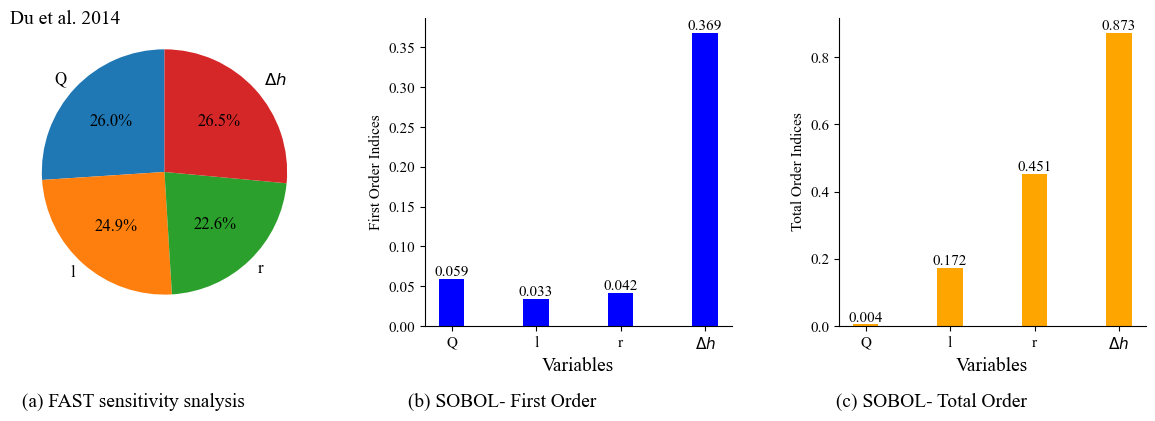

Most sensitive parameter: $\Delta h$
Least sensitive parameter: l
Parameters in descending order of sensitivity:
$\Delta h$ > r > l > Q
Top 3 sensitivity parameters based on combined indices: ['$\\Delta h$', 'r', 'l']


In [9]:
# Model Name: Du et al. 2014

ot.RandomGenerator.SetSeed(0)

formula = ['(Q*l)/(3.141592654*(r^2)*delta_h)'] 

model = ot.SymbolicFunction(['Q', 'l', 'r', 'delta_h'], formula)
distributions = [ot.Uniform(0.004992, 840), # flow rate [m3d-1]
                 ot.Uniform(1, 10), # distance between any two piezometric tubes along the column [m]
                 ot.Uniform(1, 5), # Inner diameter of the column [m]
                 ot.Uniform(0.001, 4.1)] #  hydraulic head difference at a difference l [m]

distribution = ot.ComposedDistribution(distributions)
print(distribution)
sensitivityAnalysis = ot.FAST(model, distribution, 101)
print(sensitivityAnalysis.getFirstOrderIndices())

y = np.array(sensitivityAnalysis.getFirstOrderIndices())
mylab = ['Q', 'l', 'r', r'$\Delta h$']

# FAST Analysis
hover_template = '<b>%{label}</b><br>Value: %{value:.2f}<br>Percent: %{percent:.2%}<br>First Order Index: %{text:.2E}'
fig = plt.figure(figsize=(18, 4))
gs = gridspec.GridSpec(1, 4, width_ratios=[2, 2, 2,1])

ax_pie = plt.subplot(gs[0])
ax_pie.pie(y, labels=mylab, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12})
ax_pie.set_aspect('equal')
ax_pie.text(0.4, -0.25, '(a) FAST sensitivity snalysis', ha='center', va='center', transform=ax_pie.transAxes, fontsize=14)


#SOBOL Analysis

ot.RandomGenerator.SetSeed(0)

distribution = ot.ComposedDistribution(distributions)
print(distribution)
sensitivityAnalysis = ot.SobolIndicesAlgorithm(distribution, 101, model)
print(sensitivityAnalysis.getFirstOrderIndices())

# First order index
sensitivityIndices = sensitivityAnalysis.getFirstOrderIndices()
minIndex = np.argmin(sensitivityIndices)
maxIndex = np.argmax(sensitivityIndices)
leastSensitiveVariable_first_order = mylab[minIndex]
mostSensitiveVariable_first_order = mylab[maxIndex]

# Total order index
totalOrderIndices = sensitivityAnalysis.getTotalOrderIndices()
minIndex = np.argmin(totalOrderIndices)
maxIndex = np.argmax(totalOrderIndices)
leastSensitiveVariable_total_order = mylab[minIndex]
mostSensitiveVariable_total_order = mylab[maxIndex]

y1 = np.array(sensitivityAnalysis.getFirstOrderIndices()) #defining y axis
y2 = np.array(totalOrderIndices)

# Bar Chart for First Order Indices
ax_plt1 = plt.subplot(gs[1])
bars = ax_plt1.bar(mylab, y1, color='blue', width=0.3)
#ax_plt1.set_title('First Order Indices')
ax_plt1.set_xlabel('Variables',fontsize=14)
ax_plt1.set_ylabel('First Order Indices',fontsize=11)
ax_plt1.bar_label(bars, fmt='%.3f', label_type='edge', color='black', fontsize=11)
ax_plt1.spines['top'].set_visible(False)
ax_plt1.spines['right'].set_visible(False)
ax_pie.text(1.6, -0.25, '(b) SOBOL- First Order', ha='center', va='center', transform=ax_pie.transAxes, fontsize=14)

# Bar Chart for Total Order Indices
ax_plt2 = plt.subplot(gs[2])
bars = ax_plt2.bar(mylab, y2, color='orange', width=0.3)
#ax_plt2.set_title('Total Order Indices')
ax_plt2.set_xlabel('Variables',fontsize=14)
ax_plt2.set_ylabel('Total Order Indices',fontsize=11)
ax_plt2.bar_label(bars, fmt='%.3f', label_type='edge', color='black', fontsize=11)
ax_plt2.spines['top'].set_visible(False)
ax_plt2.spines['right'].set_visible(False)
ax_pie.text(3.0, -0.25, '(c) SOBOL- Total Order', ha='center', va='center', transform=ax_pie.transAxes, fontsize=14)

# Set xlabel at the bottom for each subplot
fig.subplots_adjust(wspace=0.4)  # Adjust spacing between subplots
for ax in fig.get_axes():
    for tick in ax.xaxis.get_major_ticks():        
        tick.label.set_fontsize(11) 
        tick.label.set_color('black')
    for tick in ax.yaxis.get_major_ticks():        
        tick.label.set_fontsize(11) 
        tick.label.set_color('black')
        
plt.suptitle("Du et al. 2014", x=0.155, y=.9, fontsize=14)
plt.show()
fig.savefig('C:/Users/mouly/Dropbox/Abdul_Work/Paper/Figures/Du et al. 2014.jpg', dpi=300, bbox_inches='tight')

# Normalize SOBOL indices for comparison
max_sobol_first_order = np.max(sensitivityIndices)
min_sobol_first_order = np.min(sensitivityIndices)
normalized_sobol_first_order = (sensitivityIndices - min_sobol_first_order) / (max_sobol_first_order - min_sobol_first_order)

max_sobol_total_order = np.max(totalOrderIndices)
min_sobol_total_order = np.min(totalOrderIndices)
normalized_sobol_total_order = (totalOrderIndices - min_sobol_total_order) / (max_sobol_total_order - min_sobol_total_order)

# Combine FAST and normalized SOBOL indices
# Assuming equal weight for FAST and SOBOL indices
combined_indices = {
    'FAST': y,
    'SOBOL_First_Order': normalized_sobol_first_order,
    'SOBOL_Total_Order': normalized_sobol_total_order
}

# Compute average sensitivity indices for each parameter
average_sensitivity_indices = np.mean(list(combined_indices.values()), axis=0)

# Combine and rank the parameters
combined_sensitivity = sorted(zip(average_sensitivity_indices, mylab), reverse=True)

# Extract top 3 parameters
top_3_sensitivity = combined_sensitivity[:3]

# Create list of parameters ordered by combined sensitivity
ordered_parameters = ' > '.join(param for _, param in combined_sensitivity)

# Print the most and least sensitive parameters
print(f"Most sensitive parameter: {mostSensitiveVariable_first_order}")
print(f"Least sensitive parameter: {leastSensitiveVariable_first_order}")

# Print the parameters in descending order of sensitivity
print("Parameters in descending order of sensitivity:")
print(ordered_parameters)

# Print Top 3 Sensitivity Parameters
print(f"Top 3 sensitivity parameters based on combined indices: {[param for _, param in top_3_sensitivity]}") 


# Store results in variables
most_sensitive_variable = mostSensitiveVariable_first_order
least_sensitive_variable = leastSensitiveVariable_first_order
top_3_parameters = ' > '.join([param for _, param in top_3_sensitivity])
ordered_parameters = ' > '.join(param for _, param in combined_sensitivity)

# Function to write results to file
def write_results_to_file(model_name, formula, distributions, most_sensitive_variable, least_sensitive_variable, top_3_parameters, ordered_parameters):
    # Convert distributions to a readable format
    param_ranges = {f'distribution_{i}': f"{dist.getRange().getLowerBound()[0]} - {dist.getRange().getUpperBound()[0]}" for i, dist in enumerate(distributions)}

    # Prepare the results to write
    results = (
        f"Model Name: {model_name}\n"
        f"Formula: {formula[0]}\n"
        f"Parameter Ranges: {param_ranges}\n"
        f"Most sensitive parameter: {most_sensitive_variable}\n"
        f"Least sensitive parameter: {least_sensitive_variable}\n"
        f"Top 3 sensitivity parameters based on combined indices: {top_3_parameters}\n"
        f"Parameters in descending order of sensitivity: {ordered_parameters}\n"
        "\n"
    )

    # Check if the model's results already exist in the file
    if os.path.exists('results.txt'):
        with open('results.txt', 'r') as f:
            content = f.read()
        if results not in content:
            with open('results.txt', 'a') as f:
                f.write(results)
    else:
        with open('results.txt', 'w') as f:
            f.write(results)

# Extract the current cell source code
ipython = get_ipython()
cell_source = ipython.history_manager.input_hist_parsed[-1]

# Extract model name from the first comment
model_name = ""
for line in cell_source.split('\n'):
    if line.startswith("# Model Name:"):
        model_name = line.split(": ")[1].strip()
        break

# Write results to results.txt
write_results_to_file(model_name, formula, distributions, most_sensitive_variable, least_sensitive_variable, top_3_parameters, ordered_parameters)


ComposedDistribution(Uniform(a = 100, b = 840), Uniform(a = 0.003, b = 0.006), Uniform(a = 5.65, b = 237.56), Uniform(a = 0.001, b = 4.1), IndependentCopula(dimension = 4))
[0.0726344,0.0803907,0.0687306,0.0812408]
ComposedDistribution(Uniform(a = 100, b = 840), Uniform(a = 0.003, b = 0.006), Uniform(a = 5.65, b = 237.56), Uniform(a = 0.001, b = 4.1), IndependentCopula(dimension = 4))
[0.0241123,0.0206666,0.0464679,0.273274]


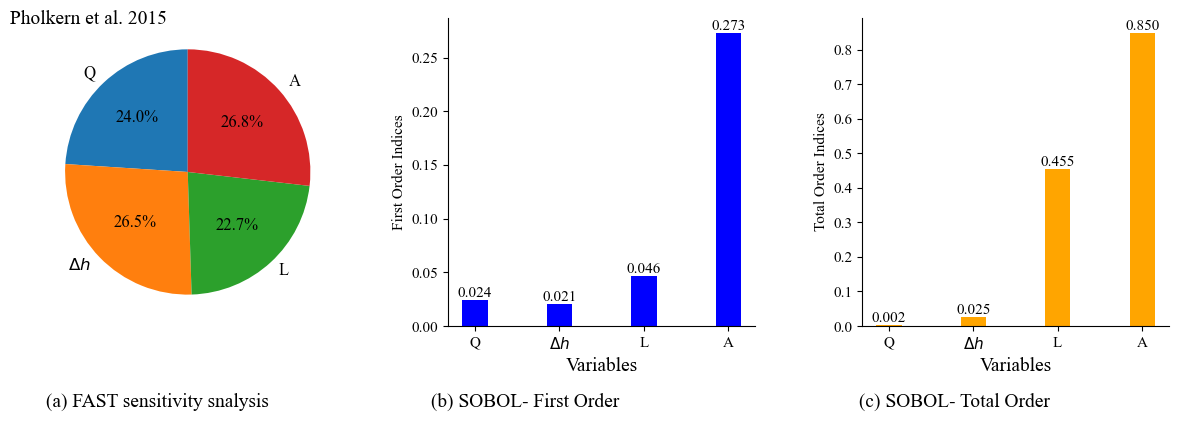

Most sensitive parameter: A
Least sensitive parameter: $\Delta h$
Parameters in descending order of sensitivity:
A > L > $\Delta h$ > Q
Top 3 sensitivity parameters based on combined indices: ['A', 'L', '$\\Delta h$']


In [10]:
# Model Name: Pholkern et al. 2015

ot.RandomGenerator.SetSeed(0)

formula = ['(Q*L)/(A*delta_h)'] 

model = ot.SymbolicFunction(['Q', 'L', 'A', 'delta_h'], formula)
distributions = [ot.Uniform(100, 840), # Outflow / Infiltration discharge [m3/s]
                 ot.Uniform(0.003, 0.006), #Thickness of clogging layer
                 ot.Uniform(5.65, 237.56), # Area of flow [m2]
                 ot.Uniform(0.001, 4.1)] #  Head difference [m]

distribution = ot.ComposedDistribution(distributions)
print(distribution)
sensitivityAnalysis = ot.FAST(model, distribution, 101)
print(sensitivityAnalysis.getFirstOrderIndices())

y = np.array(sensitivityAnalysis.getFirstOrderIndices())
mylab = ['Q', r'$\Delta h$', 'L', 'A']

# FAST Analysis
hover_template = '<b>%{label}</b><br>Value: %{value:.2f}<br>Percent: %{percent:.2%}<br>First Order Index: %{text:.2E}'
fig = plt.figure(figsize=(18, 4))
gs = gridspec.GridSpec(1, 4, width_ratios=[2, 2, 2,1])

ax_pie = plt.subplot(gs[0])
ax_pie.pie(y, labels=mylab, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12})
ax_pie.set_aspect('equal')
ax_pie.text(0.4, -0.25, '(a) FAST sensitivity snalysis', ha='center', va='center', transform=ax_pie.transAxes, fontsize=14)


#SOBOL Analysis

ot.RandomGenerator.SetSeed(0)

distribution = ot.ComposedDistribution(distributions)
print(distribution)
sensitivityAnalysis = ot.SobolIndicesAlgorithm(distribution, 101, model)
print(sensitivityAnalysis.getFirstOrderIndices())

# First order index
sensitivityIndices = sensitivityAnalysis.getFirstOrderIndices()
minIndex = np.argmin(sensitivityIndices)
maxIndex = np.argmax(sensitivityIndices)
leastSensitiveVariable_first_order = mylab[minIndex]
mostSensitiveVariable_first_order = mylab[maxIndex]

# Total order index
totalOrderIndices = sensitivityAnalysis.getTotalOrderIndices()
minIndex = np.argmin(totalOrderIndices)
maxIndex = np.argmax(totalOrderIndices)
leastSensitiveVariable_total_order = mylab[minIndex]
mostSensitiveVariable_total_order = mylab[maxIndex]

y1 = np.array(sensitivityAnalysis.getFirstOrderIndices()) #defining y axis
y2 = np.array(totalOrderIndices)

# Bar Chart for First Order Indices
ax_plt1 = plt.subplot(gs[1])
bars = ax_plt1.bar(mylab, y1, color='blue', width=0.3)
#ax_plt1.set_title('First Order Indices')
ax_plt1.set_xlabel('Variables',fontsize=14)
ax_plt1.set_ylabel('First Order Indices',fontsize=11)
ax_plt1.bar_label(bars, fmt='%.3f', label_type='edge', color='black', fontsize=11)
ax_plt1.spines['top'].set_visible(False)
ax_plt1.spines['right'].set_visible(False)
ax_pie.text(1.6, -0.25, '(b) SOBOL- First Order', ha='center', va='center', transform=ax_pie.transAxes, fontsize=14)

# Bar Chart for Total Order Indices
ax_plt2 = plt.subplot(gs[2])
bars = ax_plt2.bar(mylab, y2, color='orange', width=0.3)
#ax_plt2.set_title('Total Order Indices')
ax_plt2.set_xlabel('Variables',fontsize=14)
ax_plt2.set_ylabel('Total Order Indices',fontsize=11)
ax_plt2.bar_label(bars, fmt='%.3f', label_type='edge', color='black', fontsize=11)
ax_plt2.spines['top'].set_visible(False)
ax_plt2.spines['right'].set_visible(False)
ax_pie.text(3.0, -0.25, '(c) SOBOL- Total Order', ha='center', va='center', transform=ax_pie.transAxes, fontsize=14)

# Set xlabel at the bottom for each subplot
fig.subplots_adjust(wspace=0.4)  # Adjust spacing between subplots
for ax in fig.get_axes():
    for tick in ax.xaxis.get_major_ticks():        
        tick.label.set_fontsize(11) 
        tick.label.set_color('black')
    for tick in ax.yaxis.get_major_ticks():        
        tick.label.set_fontsize(11) 
        tick.label.set_color('black')
        
plt.suptitle("Pholkern et al. 2015", x=0.155, y=.9, fontsize=14)
plt.show()
fig.savefig('C:/Users/mouly/Dropbox/Abdul_Work/Paper/Figures/Pholkern et al. 2015.jpg', dpi=300, bbox_inches='tight')

# Normalize SOBOL indices for comparison
max_sobol_first_order = np.max(sensitivityIndices)
min_sobol_first_order = np.min(sensitivityIndices)
normalized_sobol_first_order = (sensitivityIndices - min_sobol_first_order) / (max_sobol_first_order - min_sobol_first_order)

max_sobol_total_order = np.max(totalOrderIndices)
min_sobol_total_order = np.min(totalOrderIndices)
normalized_sobol_total_order = (totalOrderIndices - min_sobol_total_order) / (max_sobol_total_order - min_sobol_total_order)

# Combine FAST and normalized SOBOL indices
# Assuming equal weight for FAST and SOBOL indices
combined_indices = {
    'FAST': y,
    'SOBOL_First_Order': normalized_sobol_first_order,
    'SOBOL_Total_Order': normalized_sobol_total_order
}

# Compute average sensitivity indices for each parameter
average_sensitivity_indices = np.mean(list(combined_indices.values()), axis=0)

# Combine and rank the parameters
combined_sensitivity = sorted(zip(average_sensitivity_indices, mylab), reverse=True)

# Extract top 3 parameters
top_3_sensitivity = combined_sensitivity[:3]

# Create list of parameters ordered by combined sensitivity
ordered_parameters = ' > '.join(param for _, param in combined_sensitivity)

# Print the most and least sensitive parameters
print(f"Most sensitive parameter: {mostSensitiveVariable_first_order}")
print(f"Least sensitive parameter: {leastSensitiveVariable_first_order}")

# Print the parameters in descending order of sensitivity
print("Parameters in descending order of sensitivity:")
print(ordered_parameters)

# Print Top 3 Sensitivity Parameters
print(f"Top 3 sensitivity parameters based on combined indices: {[param for _, param in top_3_sensitivity]}")


# Store results in variables
most_sensitive_variable = mostSensitiveVariable_first_order
least_sensitive_variable = leastSensitiveVariable_first_order
top_3_parameters = ' > '.join([param for _, param in top_3_sensitivity])
ordered_parameters = ' > '.join(param for _, param in combined_sensitivity)

# Function to write results to file
def write_results_to_file(model_name, formula, distributions, most_sensitive_variable, least_sensitive_variable, top_3_parameters, ordered_parameters):
    # Convert distributions to a readable format
    param_ranges = {f'distribution_{i}': f"{dist.getRange().getLowerBound()[0]} - {dist.getRange().getUpperBound()[0]}" for i, dist in enumerate(distributions)}

    # Prepare the results to write
    results = (
        f"Model Name: {model_name}\n"
        f"Formula: {formula[0]}\n"
        f"Parameter Ranges: {param_ranges}\n"
        f"Most sensitive parameter: {most_sensitive_variable}\n"
        f"Least sensitive parameter: {least_sensitive_variable}\n"
        f"Top 3 sensitivity parameters based on combined indices: {top_3_parameters}\n"
        f"Parameters in descending order of sensitivity: {ordered_parameters}\n"
        "\n"
    )

    # Check if the model's results already exist in the file
    if os.path.exists('results.txt'):
        with open('results.txt', 'r') as f:
            content = f.read()
        if results not in content:
            with open('results.txt', 'a') as f:
                f.write(results)
    else:
        with open('results.txt', 'w') as f:
            f.write(results)

# Extract the current cell source code
ipython = get_ipython()
cell_source = ipython.history_manager.input_hist_parsed[-1]

# Extract model name from the first comment
model_name = ""
for line in cell_source.split('\n'):
    if line.startswith("# Model Name:"):
        model_name = line.split(": ")[1].strip()
        break

# Write results to results.txt
write_results_to_file(model_name, formula, distributions, most_sensitive_variable, least_sensitive_variable, top_3_parameters, ordered_parameters)


ComposedDistribution(Uniform(a = 1e-12, b = 1), Uniform(a = 0.1, b = 5145), Uniform(a = 1e-05, b = 0.002), IndependentCopula(dimension = 3))
[0.289317,0.250077,0.471395]
ComposedDistribution(Uniform(a = 1e-12, b = 1), Uniform(a = 0.1, b = 5145), Uniform(a = 1e-05, b = 0.002), IndependentCopula(dimension = 3))
[0.415293,0.474256,0.307262]


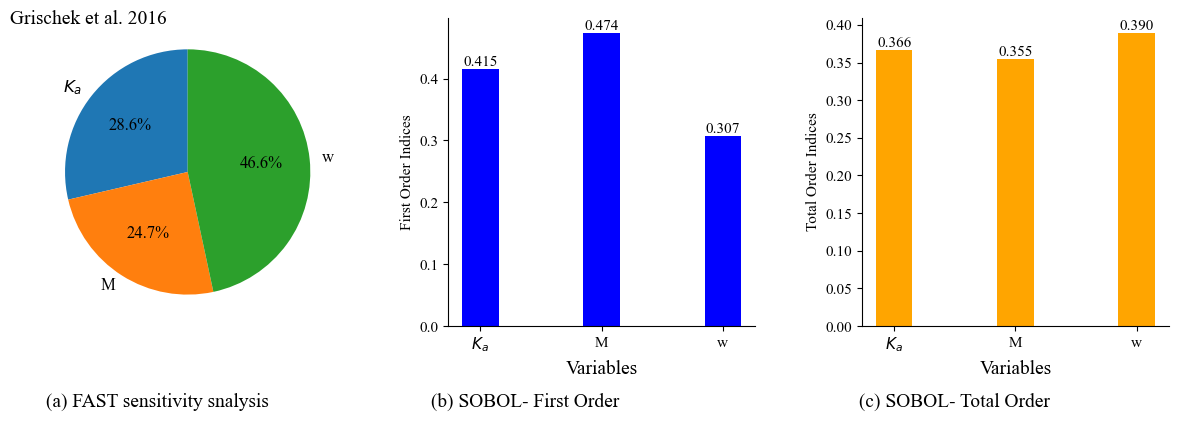

Most sensitive parameter: M
Least sensitive parameter: w
Parameters in descending order of sensitivity:
w > $K_a$ > M
Top 3 sensitivity parameters based on combined indices: ['w', '$K_a$', 'M']


In [11]:
# Model Name: Grischek et al. 2016

ot.RandomGenerator.SetSeed(0)

formula = ['(K*M*w)^(1/2)'] 

model = ot.SymbolicFunction(['K', 'M', 'w'], formula)
distributions = [ot.Uniform(1e-12, 1e0), #aquifer hydraulic conductivity (m/s)
                 ot.Uniform(0.1, 5145), # saturated thickness of aquifer below the river (m)
                 ot.Uniform(1e-5, 0.002)] # infiltration resistance (s)

distribution = ot.ComposedDistribution(distributions)
print(distribution)
sensitivityAnalysis = ot.FAST(model, distribution, 101)
print(sensitivityAnalysis.getFirstOrderIndices())

y = np.array(sensitivityAnalysis.getFirstOrderIndices())
mylab = ['$K_a$', 'M', 'w']

# FAST Analysis
hover_template = '<b>%{label}</b><br>Value: %{value:.2f}<br>Percent: %{percent:.2%}<br>First Order Index: %{text:.2E}'
fig = plt.figure(figsize=(18, 4))
gs = gridspec.GridSpec(1, 4, width_ratios=[2, 2, 2,1])

ax_pie = plt.subplot(gs[0])
ax_pie.pie(y, labels=mylab, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12})
ax_pie.set_aspect('equal')
ax_pie.text(0.4, -0.25, '(a) FAST sensitivity snalysis', ha='center', va='center', transform=ax_pie.transAxes, fontsize=14)


#SOBOL Analysis

ot.RandomGenerator.SetSeed(0)

distribution = ot.ComposedDistribution(distributions)
print(distribution)
sensitivityAnalysis = ot.SobolIndicesAlgorithm(distribution, 101, model)
print(sensitivityAnalysis.getFirstOrderIndices())

# First order index
sensitivityIndices = sensitivityAnalysis.getFirstOrderIndices()
minIndex = np.argmin(sensitivityIndices)
maxIndex = np.argmax(sensitivityIndices)
leastSensitiveVariable_first_order = mylab[minIndex]
mostSensitiveVariable_first_order = mylab[maxIndex]

# Total order index
totalOrderIndices = sensitivityAnalysis.getTotalOrderIndices()
minIndex = np.argmin(totalOrderIndices)
maxIndex = np.argmax(totalOrderIndices)
leastSensitiveVariable_total_order = mylab[minIndex]
mostSensitiveVariable_total_order = mylab[maxIndex]

y1 = np.array(sensitivityAnalysis.getFirstOrderIndices()) #defining y axis
y2 = np.array(totalOrderIndices)

# Bar Chart for First Order Indices
ax_plt1 = plt.subplot(gs[1])
bars = ax_plt1.bar(mylab, y1, color='blue', width=0.3)
#ax_plt1.set_title('First Order Indices')
ax_plt1.set_xlabel('Variables',fontsize=14)
ax_plt1.set_ylabel('First Order Indices',fontsize=11)
ax_plt1.bar_label(bars, fmt='%.3f', label_type='edge', color='black', fontsize=11)
ax_plt1.spines['top'].set_visible(False)
ax_plt1.spines['right'].set_visible(False)
ax_pie.text(1.6, -0.25, '(b) SOBOL- First Order', ha='center', va='center', transform=ax_pie.transAxes, fontsize=14)

# Bar Chart for Total Order Indices
ax_plt2 = plt.subplot(gs[2])
bars = ax_plt2.bar(mylab, y2, color='orange', width=0.3)
#ax_plt2.set_title('Total Order Indices')
ax_plt2.set_xlabel('Variables',fontsize=14)
ax_plt2.set_ylabel('Total Order Indices',fontsize=11)
ax_plt2.bar_label(bars, fmt='%.3f', label_type='edge', color='black', fontsize=11)
ax_plt2.spines['top'].set_visible(False)
ax_plt2.spines['right'].set_visible(False)
ax_pie.text(3.0, -0.25, '(c) SOBOL- Total Order', ha='center', va='center', transform=ax_pie.transAxes, fontsize=14)

# Set xlabel at the bottom for each subplot
fig.subplots_adjust(wspace=0.4)  # Adjust spacing between subplots
for ax in fig.get_axes():
    for tick in ax.xaxis.get_major_ticks():        
        tick.label.set_fontsize(11) 
        tick.label.set_color('black')
    for tick in ax.yaxis.get_major_ticks():        
        tick.label.set_fontsize(11) 
        tick.label.set_color('black')
        
plt.suptitle("Grischek et al. 2016", x=0.155, y=.9, fontsize=14)
plt.show()
fig.savefig('C:/Users/mouly/Dropbox/Abdul_Work/Paper/Figures/Grischek et al. 2016.jpg', dpi=300, bbox_inches='tight')

# Normalize SOBOL indices for comparison
max_sobol_first_order = np.max(sensitivityIndices)
min_sobol_first_order = np.min(sensitivityIndices)
normalized_sobol_first_order = (sensitivityIndices - min_sobol_first_order) / (max_sobol_first_order - min_sobol_first_order)

max_sobol_total_order = np.max(totalOrderIndices)
min_sobol_total_order = np.min(totalOrderIndices)
normalized_sobol_total_order = (totalOrderIndices - min_sobol_total_order) / (max_sobol_total_order - min_sobol_total_order)

# Combine FAST and normalized SOBOL indices
# Assuming equal weight for FAST and SOBOL indices
combined_indices = {
    'FAST': y,
    'SOBOL_First_Order': normalized_sobol_first_order,
    'SOBOL_Total_Order': normalized_sobol_total_order
}

# Compute average sensitivity indices for each parameter
average_sensitivity_indices = np.mean(list(combined_indices.values()), axis=0)

# Combine and rank the parameters
combined_sensitivity = sorted(zip(average_sensitivity_indices, mylab), reverse=True)

# Extract top 3 parameters
top_3_sensitivity = combined_sensitivity[:3]

# Create list of parameters ordered by combined sensitivity
ordered_parameters = ' > '.join(param for _, param in combined_sensitivity)

# Print the most and least sensitive parameters
print(f"Most sensitive parameter: {mostSensitiveVariable_first_order}")
print(f"Least sensitive parameter: {leastSensitiveVariable_first_order}")

# Print the parameters in descending order of sensitivity
print("Parameters in descending order of sensitivity:")
print(ordered_parameters)

# Print Top 3 Sensitivity Parameters
print(f"Top 3 sensitivity parameters based on combined indices: {[param for _, param in top_3_sensitivity]}")


# Store results in variables
most_sensitive_variable = mostSensitiveVariable_first_order
least_sensitive_variable = leastSensitiveVariable_first_order
top_3_parameters = ' > '.join([param for _, param in top_3_sensitivity])
ordered_parameters = ' > '.join(param for _, param in combined_sensitivity)

# Function to write results to file
def write_results_to_file(model_name, formula, distributions, most_sensitive_variable, least_sensitive_variable, top_3_parameters, ordered_parameters):
    # Convert distributions to a readable format
    param_ranges = {f'distribution_{i}': f"{dist.getRange().getLowerBound()[0]} - {dist.getRange().getUpperBound()[0]}" for i, dist in enumerate(distributions)}

    # Prepare the results to write
    results = (
        f"Model Name: {model_name}\n"
        f"Formula: {formula[0]}\n"
        f"Parameter Ranges: {param_ranges}\n"
        f"Most sensitive parameter: {most_sensitive_variable}\n"
        f"Least sensitive parameter: {least_sensitive_variable}\n"
        f"Top 3 sensitivity parameters based on combined indices: {top_3_parameters}\n"
        f"Parameters in descending order of sensitivity: {ordered_parameters}\n"
        "\n"
    )

    # Check if the model's results already exist in the file
    if os.path.exists('results.txt'):
        with open('results.txt', 'r') as f:
            content = f.read()
        if results not in content:
            with open('results.txt', 'a') as f:
                f.write(results)
    else:
        with open('results.txt', 'w') as f:
            f.write(results)

# Extract the current cell source code
ipython = get_ipython()
cell_source = ipython.history_manager.input_hist_parsed[-1]

# Extract model name from the first comment
model_name = ""
for line in cell_source.split('\n'):
    if line.startswith("# Model Name:"):
        model_name = line.split(": ")[1].strip()
        break

# Write results to results.txt
write_results_to_file(model_name, formula, distributions, most_sensitive_variable, least_sensitive_variable, top_3_parameters, ordered_parameters)


ComposedDistribution(Uniform(a = 0.9144, b = 457.2), Uniform(a = 10, b = 50), Uniform(a = 1.5, b = 7), Uniform(a = 0.0718, b = 0.547), Uniform(a = 90, b = 400), Uniform(a = 5, b = 50), Uniform(a = 90, b = 400), Uniform(a = 1, b = 10), Uniform(a = 130, b = 270), IndependentCopula(dimension = 9))
[0.153237,0.000170785,0.000578776,0.000680888,0.335587,0.166842,0.140803,0.00190416,0.107503]
ComposedDistribution(Uniform(a = 0.9144, b = 457.2), Uniform(a = 10, b = 50), Uniform(a = 1.5, b = 7), Uniform(a = 0.0718, b = 0.547), Uniform(a = 90, b = 400), Uniform(a = 5, b = 50), Uniform(a = 90, b = 400), Uniform(a = 1, b = 10), Uniform(a = 130, b = 270), IndependentCopula(dimension = 9))
[0.0874343,-0.182135,-0.182135,-0.182135,0.0312603,0.0327253,-0.169842,-0.184193,-0.19805]


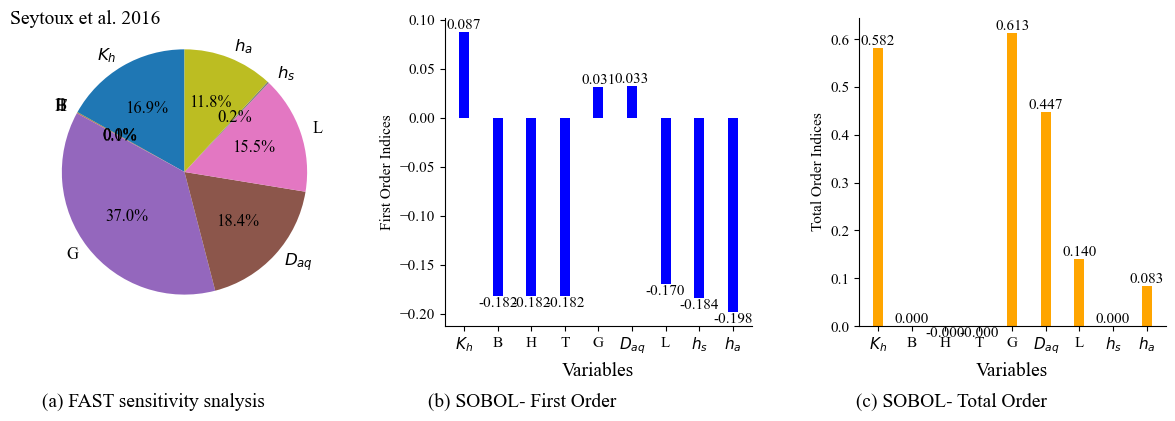

Most sensitive parameter: $K_h$
Least sensitive parameter: $h_a$
Parameters in descending order of sensitivity:
G > $K_h$ > $D_{aq}$ > L > $h_a$ > T > H > B > $h_s$
Top 3 sensitivity parameters based on combined indices: ['G', '$K_h$', '$D_{aq}$']


In [12]:
# Model Name: Seytoux et al. 2016

ot.RandomGenerator.SetSeed(0)
formula = ['(((2*Kh)/(B+H))*(T/((1-(G/Daq))*T)))*(L*(B+H)*(hs-ha))']

model = ot.SymbolicFunction(['Kh', 'B', 'H', 'T', 'G', 'Daq', 'L', 'hs', 'ha'], formula)
distributions = [ot.Uniform(0.9144, 457.2), #  horizontal hydraulic conductivity
                 ot.Uniform(10, 50), #  half width of the river
                 ot.Uniform(1.5, 7), # depth of water in river from water surface to streambed
                 ot.Uniform(0.0718, 0.547), # clogging  layer  correction
                 ot.Uniform(90, 400), # Grid size
                 ot.Uniform(5, 50), # Aquifer thickness
                 ot.Uniform(90, 400), #  length of the river reach within the river cell
                 ot.Uniform(1, 10), # head in river
                 ot.Uniform(130, 270)] #  head in aquifer

distribution = ot.ComposedDistribution(distributions)
print(distribution)
sensitivityAnalysis = ot.FAST(model, distribution, 101)
print(sensitivityAnalysis.getFirstOrderIndices())

y = np.array(sensitivityAnalysis.getFirstOrderIndices())
mylab = ['$K_h$', 'B', 'H', 'T', 'G', '$D_{aq}$', 'L', '$h_s$', '$h_a$']

# FAST Analysis
hover_template = '<b>%{label}</b><br>Value: %{value:.2f}<br>Percent: %{percent:.2%}<br>First Order Index: %{text:.2E}'
fig = plt.figure(figsize=(18, 4))
gs = gridspec.GridSpec(1, 4, width_ratios=[2, 2, 2,1])

ax_pie = plt.subplot(gs[0])
ax_pie.pie(y, labels=mylab, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12})
ax_pie.set_aspect('equal')
ax_pie.text(0.4, -0.25, '(a) FAST sensitivity snalysis', ha='center', va='center', transform=ax_pie.transAxes, fontsize=14)


#SOBOL Analysis

ot.RandomGenerator.SetSeed(0)

distribution = ot.ComposedDistribution(distributions)
print(distribution)
sensitivityAnalysis = ot.SobolIndicesAlgorithm(distribution, 101, model)
print(sensitivityAnalysis.getFirstOrderIndices())

# First order index
sensitivityIndices = sensitivityAnalysis.getFirstOrderIndices()
minIndex = np.argmin(sensitivityIndices)
maxIndex = np.argmax(sensitivityIndices)
leastSensitiveVariable_first_order = mylab[minIndex]
mostSensitiveVariable_first_order = mylab[maxIndex]

# Total order index
totalOrderIndices = sensitivityAnalysis.getTotalOrderIndices()
minIndex = np.argmin(totalOrderIndices)
maxIndex = np.argmax(totalOrderIndices)
leastSensitiveVariable_total_order = mylab[minIndex]
mostSensitiveVariable_total_order = mylab[maxIndex]

y1 = np.array(sensitivityAnalysis.getFirstOrderIndices()) #defining y axis
y2 = np.array(totalOrderIndices)

# Bar Chart for First Order Indices
ax_plt1 = plt.subplot(gs[1])
bars = ax_plt1.bar(mylab, y1, color='blue', width=0.3)
#ax_plt1.set_title('First Order Indices')
ax_plt1.set_xlabel('Variables',fontsize=14)
ax_plt1.set_ylabel('First Order Indices',fontsize=11)
ax_plt1.bar_label(bars, fmt='%.3f', label_type='edge', color='black', fontsize=11)
ax_plt1.spines['top'].set_visible(False)
ax_plt1.spines['right'].set_visible(False)
ax_pie.text(1.6, -0.25, '(b) SOBOL- First Order', ha='center', va='center', transform=ax_pie.transAxes, fontsize=14)

# Bar Chart for Total Order Indices
ax_plt2 = plt.subplot(gs[2])
bars = ax_plt2.bar(mylab, y2, color='orange', width=0.3)
#ax_plt2.set_title('Total Order Indices')
ax_plt2.set_xlabel('Variables',fontsize=14)
ax_plt2.set_ylabel('Total Order Indices',fontsize=11)
ax_plt2.bar_label(bars, fmt='%.3f', label_type='edge', color='black', fontsize=11)
ax_plt2.spines['top'].set_visible(False)
ax_plt2.spines['right'].set_visible(False)
ax_pie.text(3.0, -0.25, '(c) SOBOL- Total Order', ha='center', va='center', transform=ax_pie.transAxes, fontsize=14)

# Set xlabel at the bottom for each subplot
fig.subplots_adjust(wspace=0.4)  # Adjust spacing between subplots
for ax in fig.get_axes():
    for tick in ax.xaxis.get_major_ticks():        
        tick.label.set_fontsize(11) 
        tick.label.set_color('black')
    for tick in ax.yaxis.get_major_ticks():        
        tick.label.set_fontsize(11) 
        tick.label.set_color('black')
        
plt.suptitle("Seytoux et al. 2016", x=0.155, y=.9, fontsize=14)
plt.show()
fig.savefig('C:/Users/mouly/Dropbox/Abdul_Work/Paper/Figures/Seytoux et al. 2016.jpg', dpi=300, bbox_inches='tight')

# Normalize SOBOL indices for comparison
max_sobol_first_order = np.max(sensitivityIndices)
min_sobol_first_order = np.min(sensitivityIndices)
normalized_sobol_first_order = (sensitivityIndices - min_sobol_first_order) / (max_sobol_first_order - min_sobol_first_order)

max_sobol_total_order = np.max(totalOrderIndices)
min_sobol_total_order = np.min(totalOrderIndices)
normalized_sobol_total_order = (totalOrderIndices - min_sobol_total_order) / (max_sobol_total_order - min_sobol_total_order)

# Combine FAST and normalized SOBOL indices
# Assuming equal weight for FAST and SOBOL indices
combined_indices = {
    'FAST': y,
    'SOBOL_First_Order': normalized_sobol_first_order,
    'SOBOL_Total_Order': normalized_sobol_total_order
}

# Compute average sensitivity indices for each parameter
average_sensitivity_indices = np.mean(list(combined_indices.values()), axis=0)

# Combine and rank the parameters
combined_sensitivity = sorted(zip(average_sensitivity_indices, mylab), reverse=True)

# Extract top 3 parameters
top_3_sensitivity = combined_sensitivity[:3]

# Create list of parameters ordered by combined sensitivity
ordered_parameters = ' > '.join(param for _, param in combined_sensitivity)

# Print the most and least sensitive parameters
print(f"Most sensitive parameter: {mostSensitiveVariable_first_order}")
print(f"Least sensitive parameter: {leastSensitiveVariable_first_order}")

# Print the parameters in descending order of sensitivity
print("Parameters in descending order of sensitivity:")
print(ordered_parameters)

# Print Top 3 Sensitivity Parameters
print(f"Top 3 sensitivity parameters based on combined indices: {[param for _, param in top_3_sensitivity]}")


# Store results in variables
most_sensitive_variable = mostSensitiveVariable_first_order
least_sensitive_variable = leastSensitiveVariable_first_order
top_3_parameters = ' > '.join([param for _, param in top_3_sensitivity])
ordered_parameters = ' > '.join(param for _, param in combined_sensitivity)

# Function to write results to file
def write_results_to_file(model_name, formula, distributions, most_sensitive_variable, least_sensitive_variable, top_3_parameters, ordered_parameters):
    # Convert distributions to a readable format
    param_ranges = {f'distribution_{i}': f"{dist.getRange().getLowerBound()[0]} - {dist.getRange().getUpperBound()[0]}" for i, dist in enumerate(distributions)}

    # Prepare the results to write
    results = (
        f"Model Name: {model_name}\n"
        f"Formula: {formula[0]}\n"
        f"Parameter Ranges: {param_ranges}\n"
        f"Most sensitive parameter: {most_sensitive_variable}\n"
        f"Least sensitive parameter: {least_sensitive_variable}\n"
        f"Top 3 sensitivity parameters based on combined indices: {top_3_parameters}\n"
        f"Parameters in descending order of sensitivity: {ordered_parameters}\n"
        "\n"
    )

    # Check if the model's results already exist in the file
    if os.path.exists('results.txt'):
        with open('results.txt', 'r') as f:
            content = f.read()
        if results not in content:
            with open('results.txt', 'a') as f:
                f.write(results)
    else:
        with open('results.txt', 'w') as f:
            f.write(results)

# Extract the current cell source code
ipython = get_ipython()
cell_source = ipython.history_manager.input_hist_parsed[-1]

# Extract model name from the first comment
model_name = ""
for line in cell_source.split('\n'):
    if line.startswith("# Model Name:"):
        model_name = line.split(": ")[1].strip()
        break

# Write results to results.txt
write_results_to_file(model_name, formula, distributions, most_sensitive_variable, least_sensitive_variable, top_3_parameters, ordered_parameters)


In [16]:
# Path to the results file
results_file = 'results.txt'
csv_path = 'C:/Users/mouly/Dropbox/Abdul_Work/Paper/Codes/Model_Summary.csv'

# Initialize lists to store extracted data
model_names = []
formulas = []
parameter_ranges_list = []
most_sensitive_parameters = []
least_sensitive_parameters = []
top_3_parameters_list = []
ordered_parameters_list = []

# Read from the results file and extract information
with open(results_file, 'r') as f:
    lines = f.readlines()
    
    current_model = {}
    for line in lines:
        if line.strip() == "":  # Skip empty lines
            continue
        try:
            if line.startswith("Model Name:"):
                if current_model:
                    # Append the previous model's data to the lists
                    model_names.append(current_model.get("Model Name", "Unknown"))
                    formulas.append(current_model.get("Formula", "Unknown"))
                    parameter_ranges_list.append(current_model.get("Parameter Ranges", "Unknown"))
                    most_sensitive_parameters.append(current_model.get("Most sensitive parameter", "Unknown"))
                    least_sensitive_parameters.append(current_model.get("Least sensitive parameter", "Unknown"))
                    top_3_parameters_list.append(current_model.get("Top 3 sensitivity parameters based on combined indices", "Unknown"))
                    ordered_parameters_list.append(current_model.get("Parameters in descending order of sensitivity", "Unknown"))
                    current_model = {}
                
                # Start a new model's data
                current_model["Model Name"] = line.split(": ", 1)[1].strip()
            elif line.startswith("Formula:"):
                current_model["Formula"] = line.split(": ", 1)[1].strip()
            elif line.startswith("Parameter Ranges:"):
                current_model["Parameter Ranges"] = line.split(": ", 1)[1].strip()
            elif line.startswith("Most sensitive parameter:"):
                current_model["Most sensitive parameter"] = line.split(": ", 1)[1].strip()
            elif line.startswith("Least sensitive parameter:"):
                current_model["Least sensitive parameter"] = line.split(": ", 1)[1].strip()
            elif line.startswith("Top 3 sensitivity parameters based on combined indices:"):
                current_model["Top 3 sensitivity parameters based on combined indices"] = line.split(": ", 1)[1].strip()
            elif line.startswith("Parameters in descending order of sensitivity:"):
                current_model["Parameters in descending order of sensitivity"] = line.split(": ", 1)[1].strip()
        except IndexError:
            print(f"Line skipped due to unexpected format: {line}")

    # Append the last model's data to the lists
    if current_model:
        model_names.append(current_model.get("Model Name", "Unknown"))
        formulas.append(current_model.get("Formula", "Unknown"))
        parameter_ranges_list.append(current_model.get("Parameter Ranges", "Unknown"))
        most_sensitive_parameters.append(current_model.get("Most sensitive parameter", "Unknown"))
        least_sensitive_parameters.append(current_model.get("Least sensitive parameter", "Unknown"))
        top_3_parameters_list.append(current_model.get("Top 3 sensitivity parameters based on combined indices", "Unknown"))
        ordered_parameters_list.append(current_model.get("Parameters in descending order of sensitivity", "Unknown"))

# Create a DataFrame to display the results as a table
data = {
    'Model Name': model_names,
    'Formula': formulas,
    'Parameter Ranges': parameter_ranges_list,
    'Most Sensitive Parameter': most_sensitive_parameters,
    'Least Sensitive Parameter': least_sensitive_parameters,
    'Top 3 Parameters': top_3_parameters_list,
    'Ordered Parameters': ordered_parameters_list
}

df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv(csv_path, index=False)

print(f"Summary saved to '{csv_path}'")


Summary saved to 'C:/Users/mouly/Dropbox/Abdul_Work/Paper/Codes/Model_Summary.csv'
